This notebook served for the exploration of data and feature extractions. We played with different settings and how features could be extracted based on a sample audio. The actuall feature extraction is done in "feature_extraction.py". The actual preprocessing is done in "Preprocessing"

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import pandas as pd

# other possible packages: pysptk, surfboard, torchaudio
import antropy as ant # for entropy computation
from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")

import sklearn
import scipy
import math
from scipy.signal import hilbert, butter, filtfilt, find_peaks

In [2]:
HOP_LENGTH = 512
FRAME_LENGTH = 2048

In [3]:
data_path = "../data/emodb"
audio1_path = os.path.join(data_path, "wav/03a01Fa.wav")
audio2_path = os.path.join(data_path, "wav/03a01Nc.wav")
audio3_path = os.path.join(data_path, "wav/03a07Wc.wav")

In [4]:
# load audio data
audio1, sample_rate1 = librosa.load(audio1_path, sr=None) # sr=None to keep consistency with the database at 16kHz
audio2, sample_rate2 = librosa.load(audio2_path, sr=None)
audio3, sample_rate3 = librosa.load(audio3_path, sr=None)

In [5]:
sample_rate1 # -> always the same? read in paper or check here! 
# actually in the paper they say they downsampled to 16kHz but here we have 22.05 kHz; could be due to CD recordings are
# often measured in 44.1 kHz and divisions 22.05 kHz or 11.025 kHz

16000

In [6]:
data_files = os.listdir(os.path.join(data_path, 'wav'))
err_file = data_files[83]

# Audio loading

In [7]:
ipd.Audio(audio1_path) 

In [8]:
ipd.Audio(audio2_path) 

In [9]:
ipd.Audio(audio3_path) 

In [10]:
ipd.Audio(os.path.join(data_path, 'wav', err_file))

# Waveform plotting

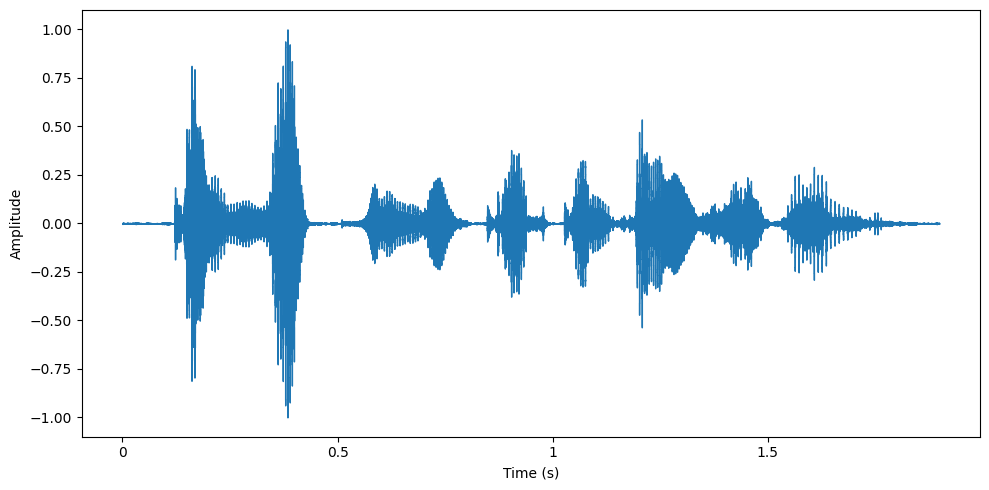

In [11]:
plt.figure(figsize=(10,5))
#plt.axis('off')
librosa.display.waveshow(audio1, sr=sample_rate1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig('../results/visualizations/example_waveform.png')
plt.savefig('../results/visualizations/example_waveform.svg')
plt.show()

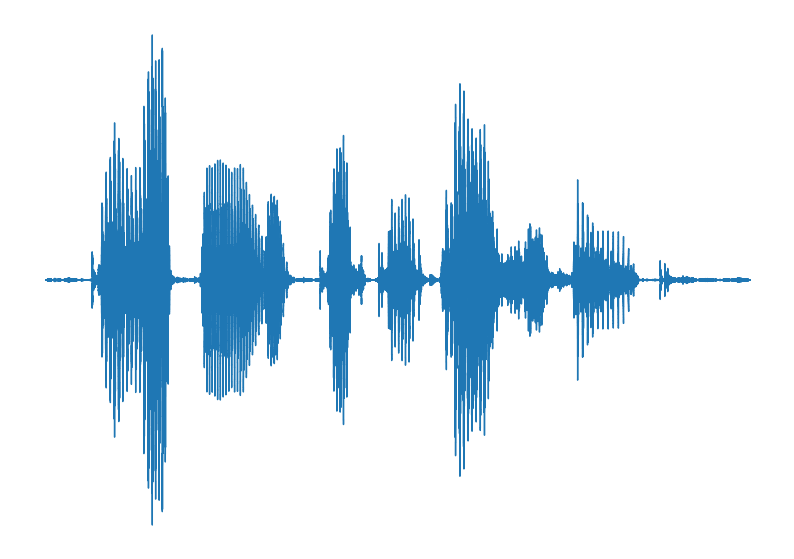

In [12]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio2, sr=sample_rate2)
plt.show()

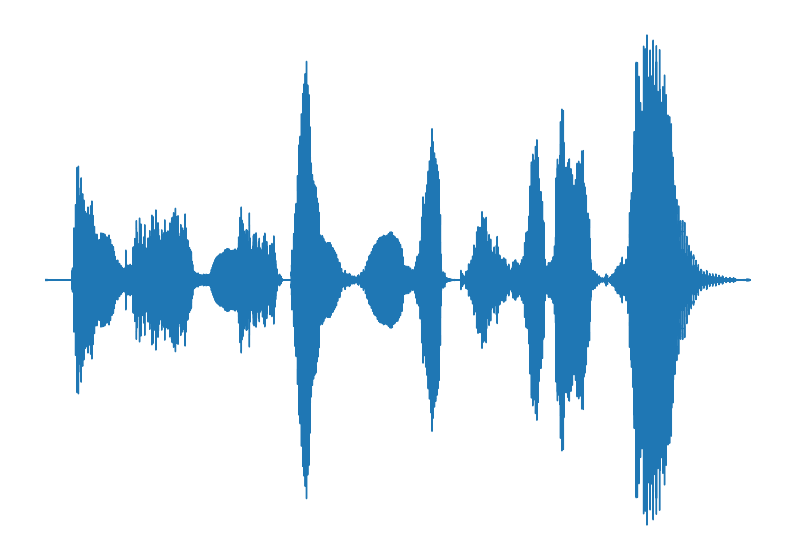

In [13]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio3, sr=sample_rate3)
plt.show()

# Spectrogram

In [15]:
def plot_spectrogram(signal, sr, name, save=False):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(spectrogram, sr=sr, y_axis="log", x_axis="time", cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    if save: 
        plt.savefig('../results/visualizations/spectrogram.png')
        plt.savefig('../results/visualizations/spectrogram.svg')
    else:
        plt.title(f"Log-frequency power spectrogram for {name}")
    plt.show()

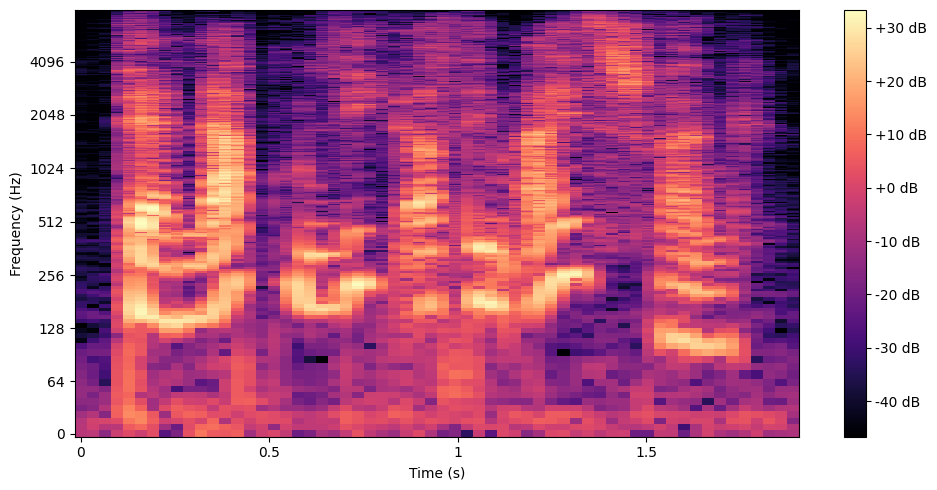

In [16]:
plot_spectrogram(audio1, sample_rate1, "test sample", save=True)

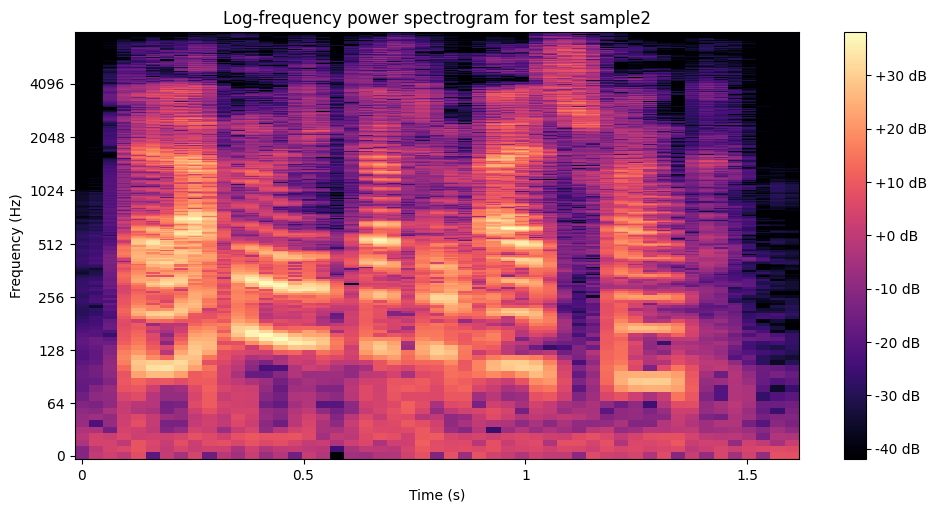

In [17]:
plot_spectrogram(audio2, sample_rate2, "test sample2")

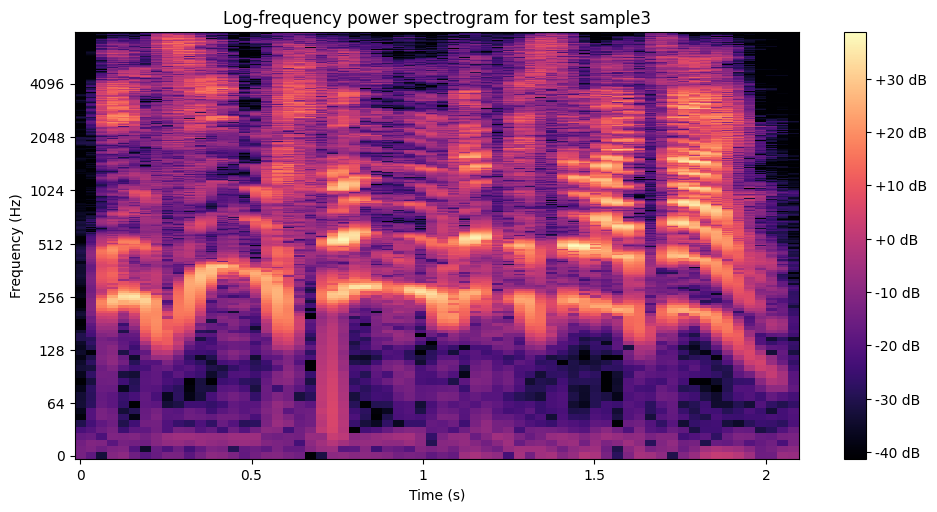

In [18]:
plot_spectrogram(audio3, sample_rate3, "test sample3")

In [19]:
librosa.feature.chroma_stft(y=audio1, sr=sample_rate1)

array([[0.88473135, 0.65595376, 0.8607815 , 0.39562958, 1.        ,
        1.        , 0.30070832, 0.09521569, 0.31974807, 0.03440497,
        0.37526527, 0.20566313, 0.34012175, 0.48791137, 0.34321132,
        0.48391232, 0.21002103, 0.15893649, 0.19590347, 0.0499445 ,
        0.01910921, 0.01536187, 0.05354922, 0.06377983, 0.07647557,
        0.13092521, 0.377395  , 0.13049771, 0.1428276 , 0.27440262,
        0.40519702, 0.887309  , 0.0807463 , 0.00886857, 0.00923563,
        0.05616063, 0.34441435, 0.179705  , 0.19491662, 0.46606606,
        1.        , 1.        , 1.        , 0.5526502 , 0.83351445,
        0.3581472 , 0.14620246, 0.15645583, 0.4499387 , 0.21188565,
        0.23915313, 0.37432024, 0.12250773, 0.03157286, 0.14719367,
        0.52147883, 0.22417453, 0.156855  , 0.55232185, 0.59264594],
       [0.8346527 , 0.6195824 , 0.72074914, 0.37644482, 0.46457767,
        0.43609232, 0.19611648, 0.49618214, 0.98734057, 0.33652294,
        0.4190518 , 0.12408597, 0.2200134 , 0.2

In [20]:
librosa.feature.melspectrogram(y=audio1, sr=sample_rate1)

array([[1.3702595e-02, 4.0931404e-02, 3.7430242e-02, ..., 1.3696878e-01,
        8.5475467e-02, 1.3893657e-02],
       [4.8334887e-03, 3.5017228e-03, 8.0639087e-03, ..., 4.0431842e-03,
        8.2362648e-03, 1.1152174e-02],
       [3.1367345e-03, 1.6344719e-03, 4.5845291e-04, ..., 3.6065064e-03,
        3.6103202e-03, 2.4494857e-03],
       ...,
       [4.0915941e-07, 9.6306212e-07, 1.1098733e-06, ..., 1.4145832e-06,
        5.6608536e-07, 1.1090027e-06],
       [3.0030935e-07, 5.2878028e-07, 5.5781237e-07, ..., 5.9684714e-07,
        3.4306808e-07, 6.6537564e-07],
       [3.9454810e-07, 2.7619788e-07, 2.3322487e-07, ..., 2.6765488e-07,
        2.3052857e-07, 4.3575008e-07]], dtype=float32)

In [21]:
librosa.feature.tonnetz(y=audio1, sr=sample_rate1)

array([[-2.73703711e-02, -1.27251919e-02, -2.41129703e-03,
         5.71273219e-03,  6.39889372e-03, -1.24091113e-02,
        -5.31608077e-04, -1.02156878e-02,  3.73078883e-02,
         1.13234277e-01,  7.54650685e-02,  7.90444396e-02,
         3.61643282e-02,  2.29082732e-03,  1.08694288e-02,
         9.88438087e-03, -7.75135826e-03,  1.60376927e-03,
         2.85371515e-02,  7.65167078e-02,  1.40355331e-01,
         1.16479124e-01,  6.38797408e-02,  1.70954044e-02,
        -2.05154674e-02, -2.92149138e-02, -2.23887832e-02,
        -5.47885503e-05,  4.06659630e-02, -2.36624792e-02,
        -9.84023980e-03, -1.01837357e-02, -5.23915408e-02,
        -5.79695932e-02, -5.78595462e-02, -4.51081892e-02,
        -2.47280995e-02, -3.91560254e-03, -2.41616512e-02,
         1.06045438e-02,  1.43457415e-02,  1.82818551e-03,
        -2.29042626e-02, -5.81945571e-03,  8.77810164e-03,
        -1.19183259e-02,  9.74954336e-03,  2.47467882e-02,
        -7.03245600e-03,  2.04482375e-02,  1.70357902e-0

In [22]:
librosa.feature.zero_crossing_rate(y=audio1)

array([[0.01855469, 0.03662109, 0.06152344, 0.10839844, 0.109375  ,
        0.11083984, 0.09716797, 0.05615234, 0.04638672, 0.0390625 ,
        0.05175781, 0.07861328, 0.08886719, 0.08056641, 0.06347656,
        0.05615234, 0.046875  , 0.04882812, 0.05175781, 0.0390625 ,
        0.046875  , 0.05273438, 0.0546875 , 0.11621094, 0.10595703,
        0.125     , 0.13818359, 0.08886719, 0.15478516, 0.19384766,
        0.17089844, 0.18212891, 0.12011719, 0.05810547, 0.07324219,
        0.07226562, 0.09472656, 0.11328125, 0.11669922, 0.09667969,
        0.09521484, 0.23388672, 0.36914062, 0.48876953, 0.56396484,
        0.47314453, 0.38623047, 0.28125   , 0.19482422, 0.1484375 ,
        0.08789062, 0.06542969, 0.04589844, 0.04541016, 0.0859375 ,
        0.125     , 0.13232422, 0.11914062, 0.06933594, 0.02392578]])

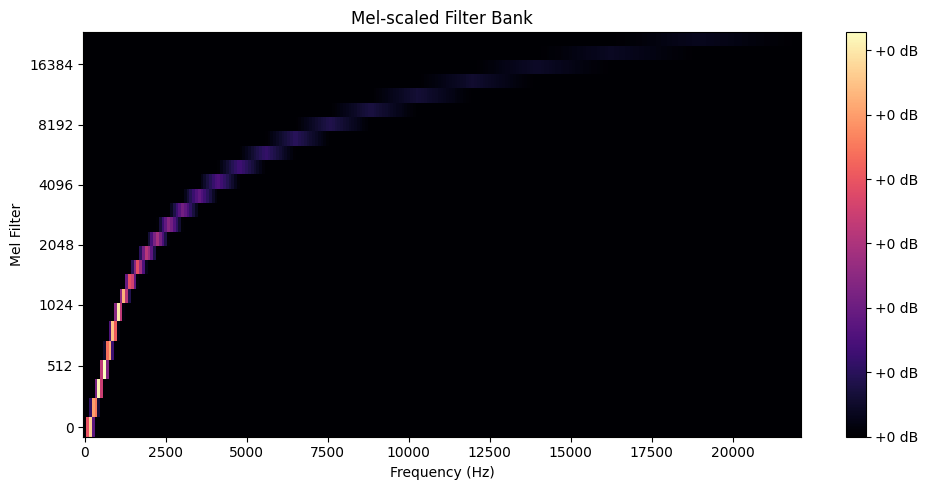

In [23]:
# mel-filter banks
num_filters = 26  # Number of filters in the filter bank
fft_size = 512  # Size of the FFT
sample_rate = 44100  # Sample rate of the audio

# Compute the mel filter bank
mel_filter_bank = librosa.filters.mel(sr=sample_rate, n_fft=fft_size, n_mels=num_filters)

# Plotting the mel filter bank
plt.figure(figsize=(10, 5))
librosa.display.specshow(mel_filter_bank, sr=sample_rate, hop_length=fft_size//2, x_axis='linear', y_axis='mel')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mel Filter')
plt.title('Mel-scaled Filter Bank')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

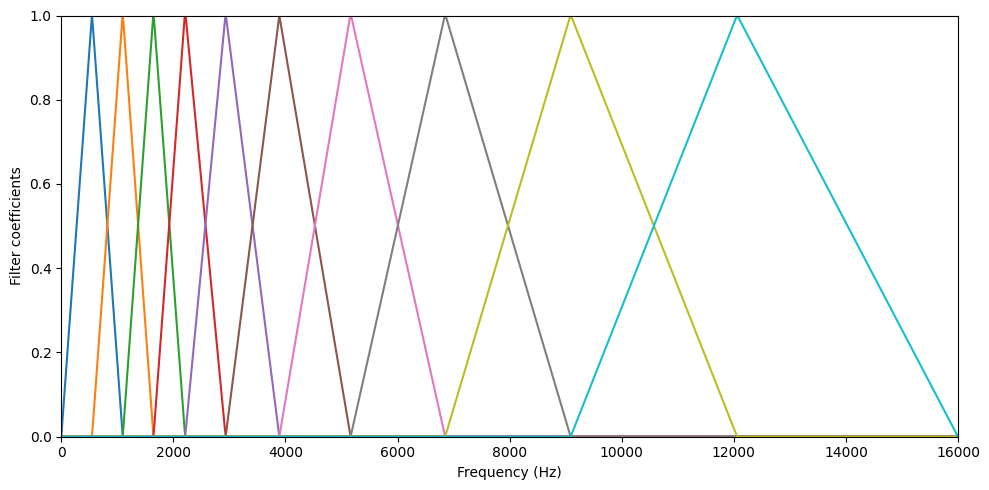

In [24]:
# plot triangular Mel filter banks
fftSize = 2048
melFb = librosa.filters.mel(sr=sample_rate1, n_fft=fftSize, n_mels=10, norm=np.inf)
melFb = melFb/np.max(melFb)
freq = np.linspace(0, sample_rate1, int(fftSize/2+1))

plt.figure(figsize=(10, 5))
plt.plot(freq, melFb.T)
plt.xlim(0,sample_rate1)
plt.ylim(0,1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter coefficients')
plt.tight_layout()
plt.savefig('../results/visualizations/mel-filterbanks.png')
plt.savefig('../results/visualizations/mel-filterbanks.svg')
plt.show()

In [25]:
def plot_mel_spectrogram(signal, sr, name, save=False):
    """Compute Mel-frequency power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(spectrogram, y_axis='mel', sr=sr, x_axis='time', cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    if save: 
        plt.savefig('../results/visualizations/melspectrogram.png')
        plt.savefig('../results/visualizations/melspectrogram.svg')
    else:
        plt.title(f"Mel-frequency power spectrogram for {name}")
    plt.show()

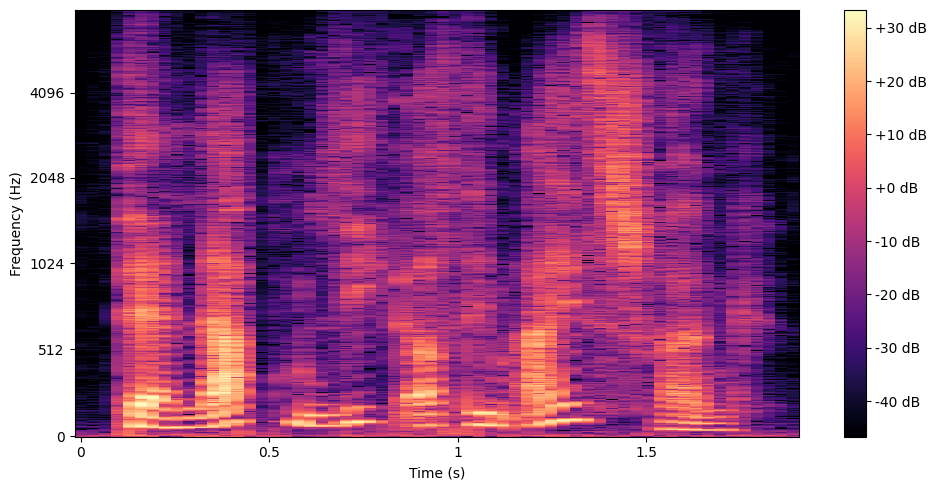

In [26]:
plot_mel_spectrogram(audio1, sample_rate1, "test sample", save=True)

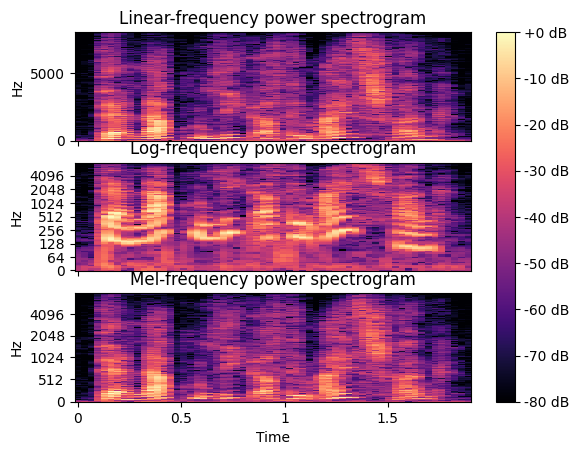

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio1)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sample_rate1, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 512
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio1, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sample_rate1, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()

librosa.display.specshow(D, y_axis='mel', sr=sample_rate1, hop_length=hop_length,
                         x_axis='time', ax=ax[2])
ax[2].set(title='Mel-frequency power spectrogram')
ax[2].label_outer()

fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

# Energy

In [28]:
# overall magnitude of a signal corresponds to its energy.
def RMS_energy(y, hop_length=512, frame_length=2048):
    return librosa.feature.rms(y=y, hop_length=hop_length, frame_length=frame_length)[0]

In [29]:
rms=RMS_energy(audio1)

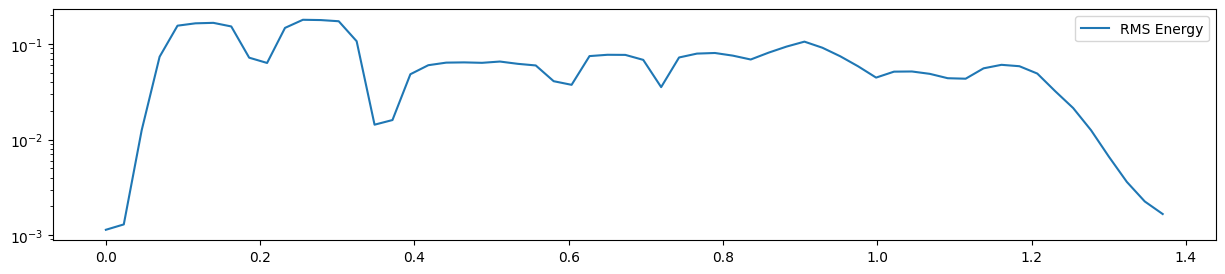

In [30]:
# Plot the RMS energy
plt.figure(figsize=(15, 3))
times = librosa.times_like(rms)
plt.semilogy(times, rms, label='RMS Energy')
plt.legend()
plt.show()

In [31]:
def energy2(x, hop_length=512, frame_length=2048):
    energy_2 = np.array([sum(abs(x[i:i+frame_length]**2)) for i in range(0, len(x), hop_length)])
    return (energy_2 - np.min(energy_2)) / (np.max(energy_2) - np.min(energy_2))

In [32]:
# detailed computation of feature vector length (number of frames on which we compute the features)
# source for understanding: https://superkogito.github.io/blog/2020/01/25/signal_framing.html
def feature_length_computation(y, sf, hop_length=512, frame_length=2048):
    duration = librosa.get_duration(y=y, sr=sr)
    
    # padding
    padding = [(0, 0) for _ in range(y.ndim)]
    padding[-1] = (int(frame_length // 2), int(frame_length // 2)) # (1024, 1024)
    # Pads with the edge values of array with 1024 padded to the edges of each axis
    y = np.pad(y, padding, mode="edge") # -> len(y) from 41857 to 43905 for audio1
    
    overall_samples = len(y) # 43905 for audio1
    overlap = frame_length - hop_length
    frames = int((overall_samples - overlap) / hop_length)
    return frames

In [33]:
feature_length_computation(audio1, sample_rate1)

60

In [34]:
feature_length_computation(audio2, sample_rate2)

51

In [35]:
def normalize(x):
    return sklearn.preprocessing.MinMaxScaler().fit_transform(np.array(x).reshape(-1,1))

In [36]:
# function to visualize different features across the wave signal
def feature_visualization(y, sf, features, title=None, base=2, sure_threshold=0.05, hop_length=512, frame_length=2048):
    t = librosa.frames_to_time(range(feature_length_computation(y, sf, hop_length=hop_length, frame_length=frame_length)
                                    ), hop_length=hop_length)
    
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(y, alpha=0.5)
    if 'spectral_entropy' in features:
        plt.plot(t, spectral_entropy(y, sf), label='spectral_entropy')
    if 'shannon_entropy' in features:
        plt.plot(t, shannon_entropy(y, base=base), label='shannon_entropy')
    if 'rms' in features:
        plt.plot(t, RMS_energy(y), label='rms_energy')
    if 'rms_log' in features:
        plt.plot(t, RMS_log_entropy(y), label='log rms')
    if 'ae' in features:
        plt.plot(t, amplitude_envelope(y), label='amplitude_envelope')
    if 'zcr' in features: 
        print(f"Overall number of zero crossings: {sum(librosa.zero_crossings(y))}")
        plt.plot(t, ZCR(y), color="r", label='zcr')
    if 'energy2' in features: # not necessary -> chose rms for norm energy
        plt.plot(t, energy2(y), label='energy2')
    if 'threshold_entropy' in features:
        plt.plot(t, threshold_entropy(y), label='threshold_entropy')
    if 'log_energy_entropy' in features:
        plt.plot(t, log_energy_entropy(y), label='log_energy_entropy')
    if 'sure_entropy' in features: 
        plt.plot(t, sure_entropy(y, threshold=sure_threshold), label='sure_entropy')
    if 'energy' in features:
        plt.plot(t, energy(y), label='energy')
    if 'spectral_centroid' in features:
        plt.plot(t, spectral_centroid(y, sf), label='spectral_centroid')
    
    
    plt.ylim((-1, 1))
    plt.xlim((t[0],t[-1]))
    plt.legend()
    plt.title(title)
    plt.show()

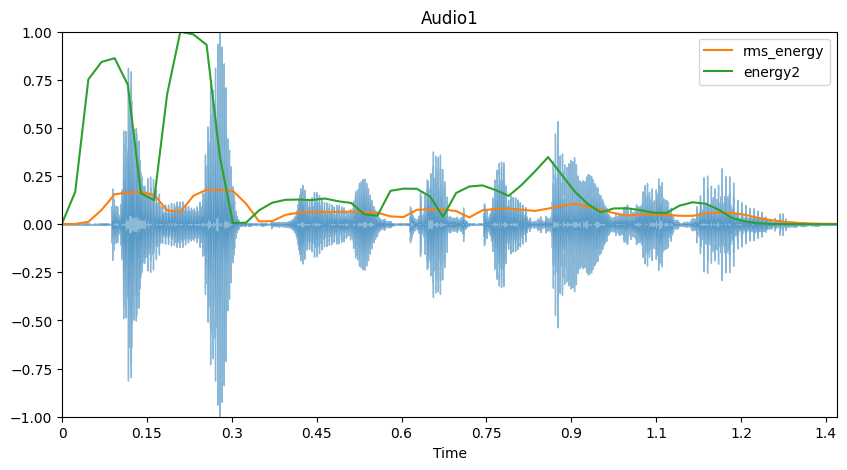

In [37]:
feature_visualization(audio1, sample_rate1, ['energy2', 'rms'], 'Audio1')

very similar! -> can use rms energy where $ RMS = \sqrt{\frac{1}{N} \sum{|x|}^2}$ which is actually like the L2-Norm; energy is usually defined as the total magnitude of the signal which would be $energy = \sum{|x|}^2$

In [38]:
def RMS_log_entropy(y, hop_length=512, frame_length=2048):
    S, phase = librosa.magphase(librosa.stft(y)) # separate spectrogram in magnitude and phase
    return librosa.feature.rms(S=S)[0]

[Text(0.5, 1.0, 'log Power spectrogram')]

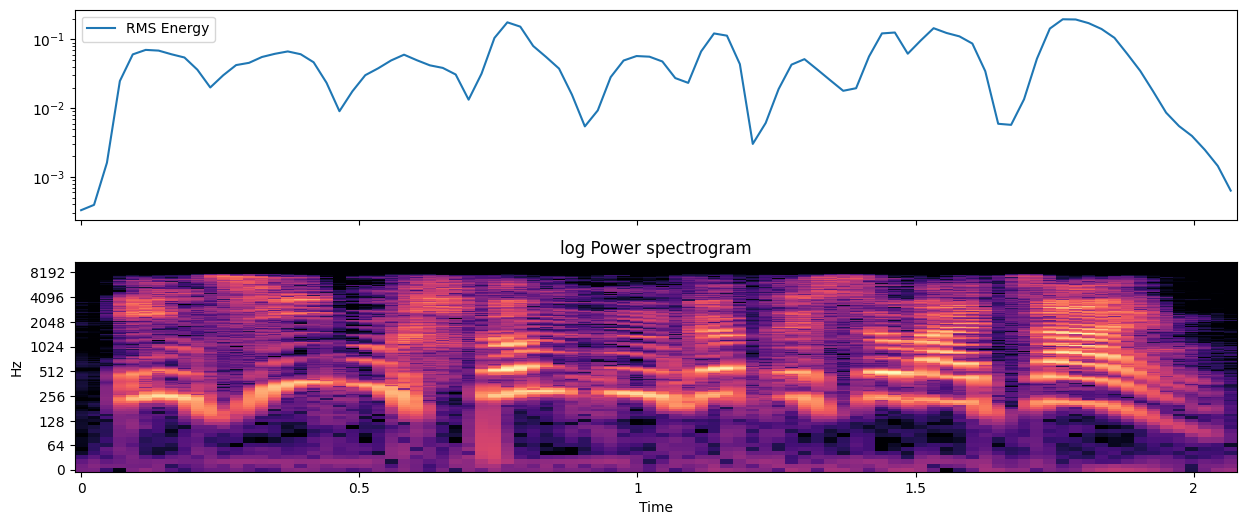

In [39]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)[0]

# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms, label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [40]:
def amplitude_envelope(y, frame_length=2048, hop_length=512):
  return np.array([max(y[i:i+frame_length]) for i in range(0, y.size, hop_length)])

In [41]:
def amplitude_envelope(y, frame_length=2048, hop_length=512):
  return np.array([np.mean(np.abs(y[i:i+frame_length])) for i in range(0, y.size, hop_length)])

In [42]:
np.average(audio1[0:512])

-0.0010380745

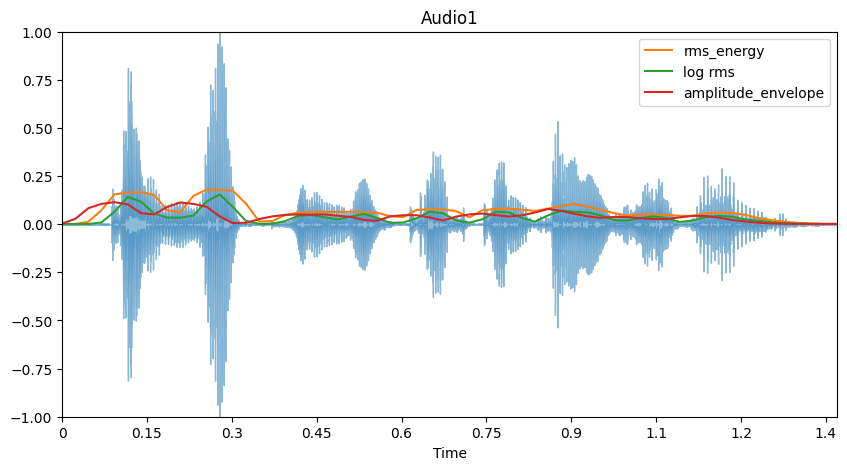

In [43]:
feature_visualization(audio1, sample_rate1, ['rms', 'rms_log', 'ae'], 'Audio1')

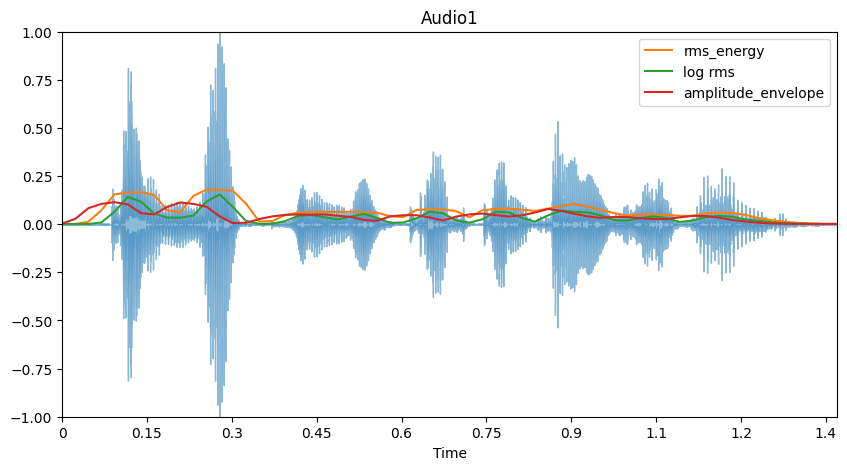

In [44]:
# with mean 
feature_visualization(audio1, sample_rate1, ['rms', 'rms_log', 'ae'], 'Audio1')

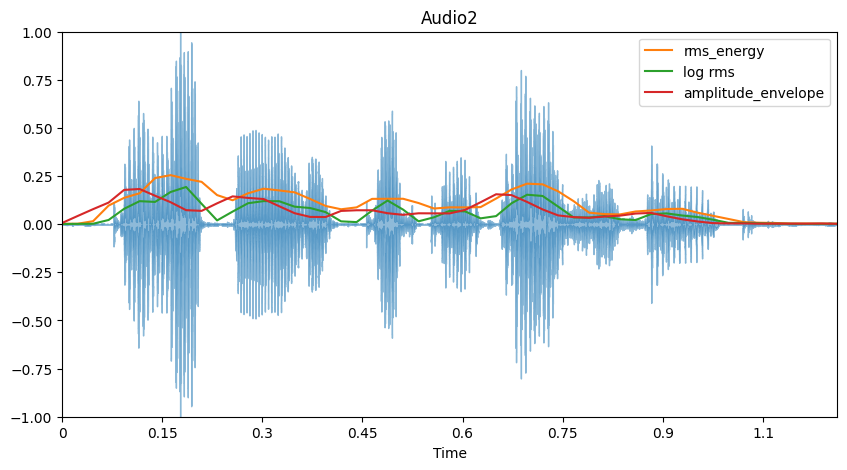

In [45]:
feature_visualization(audio2, sample_rate2, ['rms', 'rms_log', 'ae'], 'Audio2')

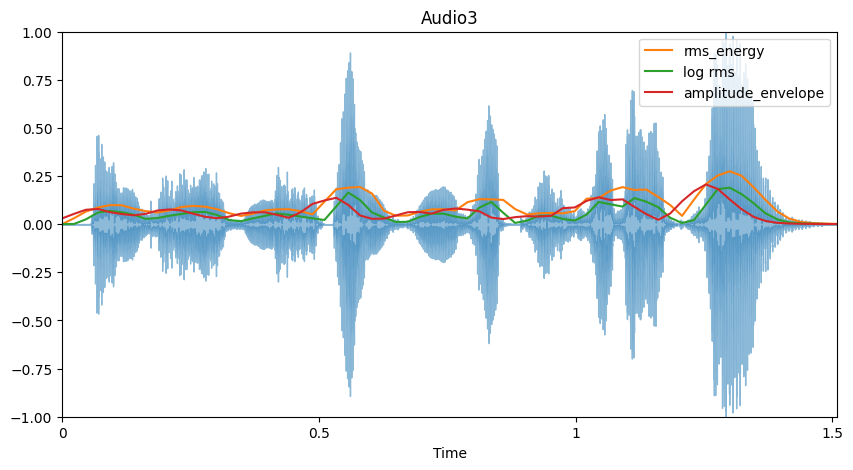

In [46]:
feature_visualization(audio3, sample_rate3, ['rms', 'rms_log', 'ae'], 'Audio3')

In [47]:
# function for zero crossing rate
# rate at which a signal changes from positive to zero to negative or from negative to zero to positive
# how often does signal cross 0/horizontal axis?
def ZCR(y, frame_length=2048, hop_length=512):
    return librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)[0]

Overall number of zero crossings: 3850


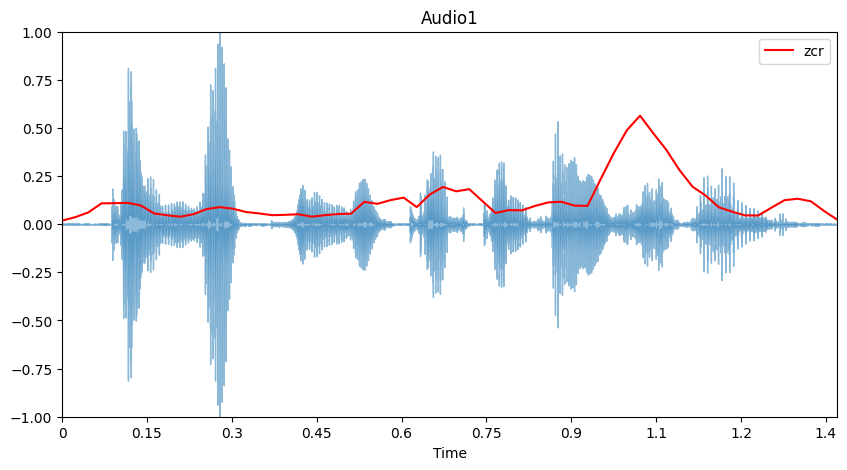

In [48]:
feature_visualization(audio1, sample_rate1, ['zcr'], 'Audio1')

Overall number of zero crossings: 2288


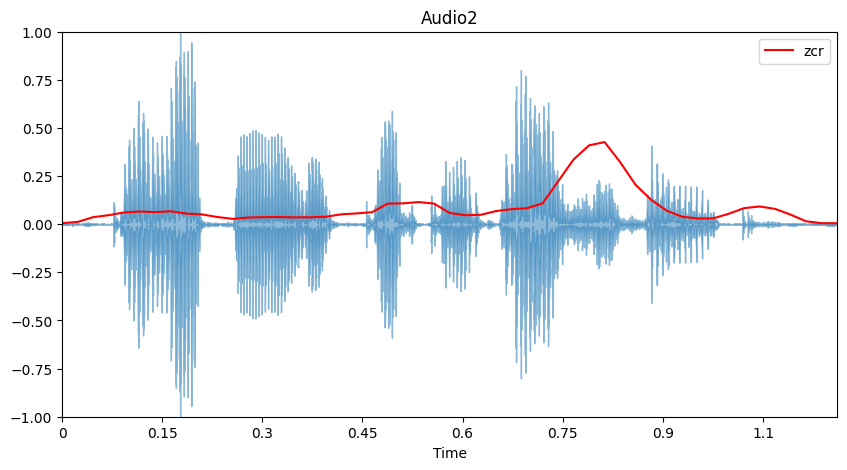

In [49]:
feature_visualization(audio2, sample_rate2, ['zcr'], 'Audio2')

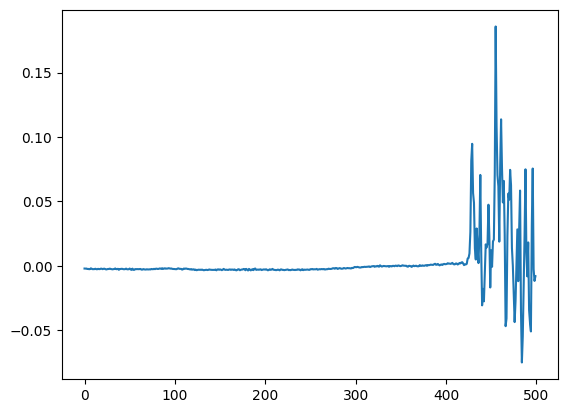

In [50]:
# zoom in
plt.plot(audio1[1500:2000])
plt.show()

In [51]:
zero_crossings = librosa.zero_crossings(audio1[1500:2000], pad=False) # actual number of zero crossing within that chosen frame
print(sum(zero_crossings))

40


# Entropy
## Spectral Entropy

In [52]:
# from source code librosa generate frames
def frames_gen(y, center=True, frame_length=2048, hop_length=512, pad_mode="constant"):
    if y is not None:
        if center:
            padding = [(0, 0) for _ in range(y.ndim)]
            padding[-1] = (int(frame_length // 2), int(frame_length // 2))
            y = np.pad(y, padding, mode=pad_mode)
            
    return librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length) 

In [53]:
# function for computation of spectral entropy
'''
    Spectral Entropy is defined to be the Shannon entropy of the power
    spectral density (PSD) of the data:
    .. math:: H(x, sf) =  -\\sum_{f=0}^{f_s/2} P(f) \\log_2[P(f)]
    Where :math:`P` is the normalised PSD, and :math:`f_s` is the sampling frequency.
'''

def spectral_entropy(y, sf, center=True):
    frames = frames_gen(y, center=center)
    frames = np.transpose(frames)
    spectral = [ant.spectral_entropy(frame, sf=sf, method='welch', normalize=True) for frame in frames]   
    return spectral

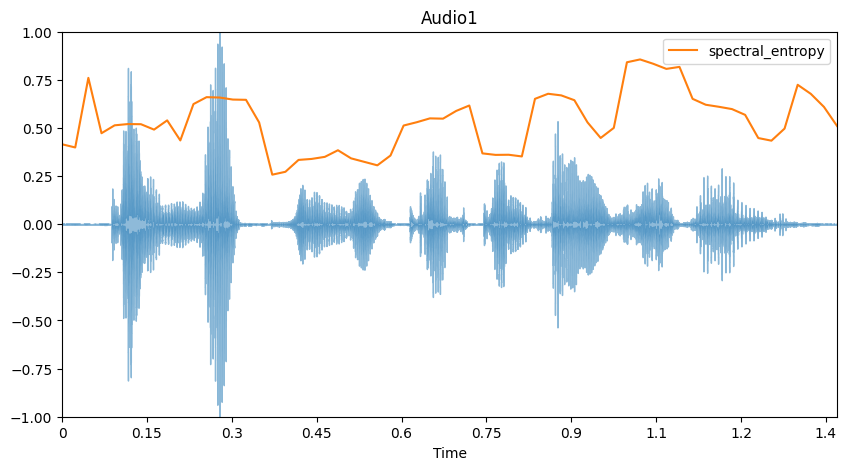

In [54]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy'], 'Audio1')

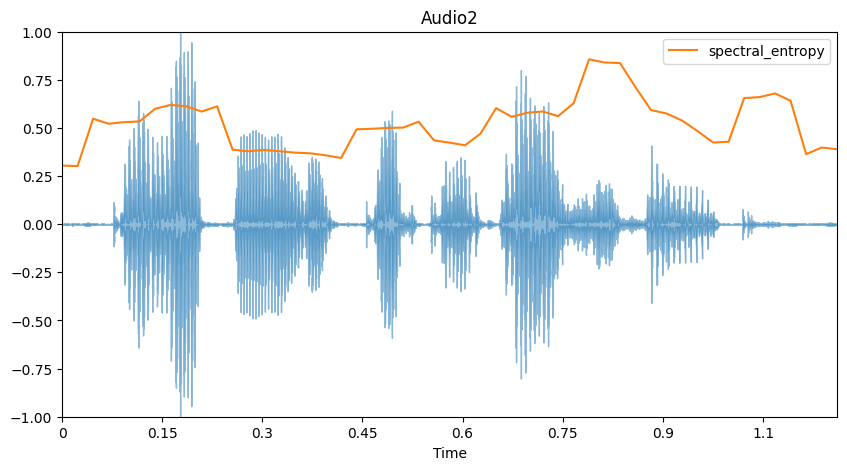

In [55]:
feature_visualization(audio2, sample_rate2, ['spectral_entropy'], 'Audio2')

In [56]:
# understand zero crossing rate (feature computation) form source code
y = audio1
frame_length = 2048
hop_length = 512

padding = [(0, 0) for _ in range(y.ndim)]
padding[-1] = (int(frame_length // 2), int(frame_length // 2))
y = np.pad(y, padding, mode="edge") 

y_framed = librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length)

crossings = librosa.zero_crossings(y_framed, axis=-2, pad=False)

zcrate = np.mean(crossings, axis=-2, keepdims=True)

In [57]:
len(y)

32420

In [58]:
np.unique(np.transpose(crossings)[0], return_counts=True)

(array([False,  True]), array([2010,   38], dtype=int64))

In [59]:
np.transpose(zcrate)[0]

array([0.01855469])

In [60]:
print(np.unique(np.transpose(crossings)[1], return_counts=True))
print(np.transpose(zcrate)[1])

(array([False,  True]), array([1973,   75], dtype=int64))
[0.03662109]


-> zcr is approximately # of True / # of False, i.e. for frame 0: 7/2041 = 0.003

**Auffällig**: rms benutzt pad mode "constant" und zcr pad mode "edge" -> for spectral, pad mode "constant" benutzt

## Log Entropy

In [61]:
from pyAudioAnalysis import ShortTermFeatures

In [62]:
features, feature_names = ShortTermFeatures.feature_extraction(audio1, sample_rate1, window=2048, step=512, deltas=True)

Padding fehlt hier leider! (siehe Länge eines features)

In [63]:
features_df = pd.DataFrame(np.transpose(features), columns = feature_names)

In [64]:
features_df

zcr    energy  energy_entropy  spectral_centroid  spectral_spread  \
0   0.044944  0.000158        0.202020           0.307196         0.254320   
1   0.090865  0.005419        0.632103           0.210162         0.238073   
2   0.103566  0.024243        1.944438           0.174423         0.191153   
3   0.112848  0.027153        2.279127           0.171609         0.187015   
4   0.096238  0.027790        2.494044           0.165190         0.181620   
5   0.055203  0.023361        2.196109           0.170063         0.184112   
6   0.045432  0.005183        2.963052           0.163987         0.180069   
7   0.038105  0.004017        2.988144           0.142141         0.182082   
8   0.051783  0.021782        2.045277           0.177752         0.170330   
9   0.078652  0.032216        2.481999           0.167157         0.145672   
10  0.085979  0.031763        2.428951           0.167394         0.143905   
11  0.078652  0.030021        2.154915           0.171203         0.146564   
12  0.063996  0.011466        1.210941           0.198423         0.186084   
13  0.055203  0.000205        0.667733           0.192397         0.207753   
14  0.047875  0.000256        0.909760           0.189671         0.247193   
15  0.048852  0.002333        1.689351           0.116700         0.190727   
16  0.049829  0.003605        2.423557           0.102373         0.168566   
17  0.036150  0.004082        2.854985           0.128984         0.202132   
18  0.045921  0.004130        2.893523           0.185626         0.250212   
19  0.051783  0.004044        2.875888           0.211880         0.249797   
20  0.053737  0.004302        2.806017           0.254268         0.260004   
21  0.116268  0.003852        2.482407           0.266018         0.261267   
22  0.102101  0.003563        2.177911           0.263318         0.255250   
23  0.123107  0.001667        1.508362           0.247939         0.246028   
24  0.136297  0.001401        1.329604           0.194450         0.201340   
25  0.087934  0.005593        2.093718           0.176512         0.180498   
26  0.154861  0.005960        2.297800           0.191762         0.197624   
27  0.193942  0.005927        2.322379           0.202227         0.213401   
28  0.175867  0.004663        1.734468           0.207825         0.217835   
29  0.189057  0.001254        1.881634           0.261968         0.270865   
30  0.128969  0.005233        1.897503           0.212439         0.257626   
31  0.064973  0.006311        2.351145           0.176773         0.232509   
32  0.075232  0.006498        2.523280           0.170503         0.227595   
33  0.071324  0.005720        2.158235           0.121645         0.177868   
34  0.093796  0.004746        2.139568           0.152745         0.140465   
35  0.112360  0.006606        2.344221           0.172392         0.157252   
36  0.115779  0.008845        2.794174           0.187503         0.179773   
37  0.095750  0.011226        3.202502           0.191733         0.188083   
38  0.095261  0.008377        3.099639           0.210205         0.215993   
39  0.234978  0.005544        2.774005           0.322400         0.301580   
40  0.370298  0.003412        2.480457           0.414873         0.310528   
41  0.490962  0.001985        2.862977           0.505099         0.254543   
42  0.565217  0.002643        2.903318           0.535607         0.199534   
43  0.473376  0.002664        2.898440           0.511369         0.190136   
44  0.385442  0.002376        2.549907           0.496275         0.178534   
45  0.281387  0.001926        2.421552           0.385294         0.232496   
46  0.193942  0.001881        2.402287           0.253038         0.225913   
47  0.148510  0.003102        2.748751           0.191849         0.202169   
48  0.088911  0.003673        3.050931           0.181471         0.197374   
49  0.065462  0.003434        3.065805           0.172097         0.194048   
50  0.046898  0.002410        2

In [65]:
ZCR(audio1)

array([0.01855469, 0.03662109, 0.06152344, 0.10839844, 0.109375  ,
       0.11083984, 0.09716797, 0.05615234, 0.04638672, 0.0390625 ,
       0.05175781, 0.07861328, 0.08886719, 0.08056641, 0.06347656,
       0.05615234, 0.046875  , 0.04882812, 0.05175781, 0.0390625 ,
       0.046875  , 0.05273438, 0.0546875 , 0.11621094, 0.10595703,
       0.125     , 0.13818359, 0.08886719, 0.15478516, 0.19384766,
       0.17089844, 0.18212891, 0.12011719, 0.05810547, 0.07324219,
       0.07226562, 0.09472656, 0.11328125, 0.11669922, 0.09667969,
       0.09521484, 0.23388672, 0.36914062, 0.48876953, 0.56396484,
       0.47314453, 0.38623047, 0.28125   , 0.19482422, 0.1484375 ,
       0.08789062, 0.06542969, 0.04589844, 0.04541016, 0.0859375 ,
       0.125     , 0.13232422, 0.11914062, 0.06933594, 0.02392578])

In [66]:
features_df.columns

Index(['zcr', 'energy', 'energy_entropy', 'spectral_centroid',
       'spectral_spread', 'spectral_entropy', 'spectral_flux',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy',
       'delta energy_entropy', 'delta spectral_centroid',
       'delta spectral_spread', 'delta spectral_entropy',
       'delta spectral_flux', 'delta spectral_rolloff', 'delta mfcc_1',
       'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5',
       'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9',
       'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13',
       'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma_4',
       'del

In [67]:
spectral_ent_norm = normalize(features[5])
spectral_ent_norm

array([[0.77198941],
       [0.19022325],
       [0.16116127],
       [0.16555142],
       [0.15689845],
       [0.16639798],
       [0.13159806],
       [0.06673119],
       [0.50298151],
       [0.48581347],
       [0.4868376 ],
       [0.48543408],
       [0.43351128],
       [0.45805228],
       [0.0936052 ],
       [0.01012323],
       [0.        ],
       [0.00176953],
       [0.02356952],
       [0.08078047],
       [0.12238109],
       [0.14073132],
       [0.13379334],
       [0.23369088],
       [0.24433033],
       [0.3109138 ],
       [0.31752509],
       [0.3101707 ],
       [0.35124265],
       [0.31995335],
       [0.05004429],
       [0.02487525],
       [0.02695423],
       [0.01250728],
       [0.47853558],
       [0.51972849],
       [0.50114568],
       [0.46356721],
       [0.32274536],
       [0.26692522],
       [0.44726115],
       [1.        ],
       [0.93171551],
       [0.88561677],
       [0.83480192],
       [0.91773591],
       [0.52776459],
       [0.348

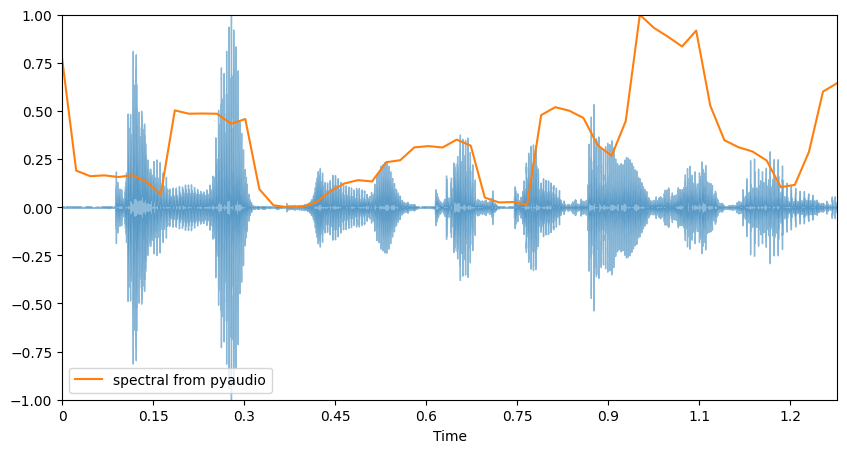

In [68]:
t = librosa.frames_to_time(range(len(spectral_ent_norm)), hop_length=512)

plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio1, alpha=0.5)
plt.plot(t, spectral_ent_norm, label='spectral from pyaudio')
plt.ylim((-1, 1))
plt.xlim((t[0],t[-1]))
plt.legend()
plt.show()

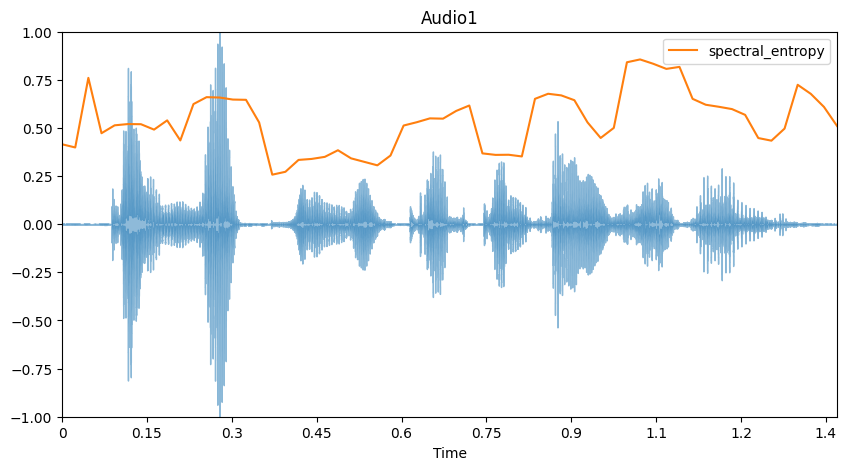

In [69]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy'], 'Audio1')

Have similar shapes but the one from antropy makes more sense compared to other features from librosa. Here we can use padding; in PyAudioaAnalysis no option for padding -> use antropy

In [70]:
def shannon_entropy(y, base=None):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    entropy_contour = [entropy(np.histogram(frame, bins=len(frame), density=True)[0], base=base) for frame in frames]
    return normalize(entropy_contour)

In [71]:
def shannon_entropy2(y, base=None):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    entropies = []
    
    for frame in frames: 
        hist, bin_edges = np.histogram(frame, bins=len(frame), density=True)
        probs = hist * np.diff(bin_edges)
        entropies.append(entropy(probs, base=base))
    
    return entropies

not necessary; already works with first version! Have almost completely same numbers/results!

"With an appropriate normalization, the power spectrum of an audio signal can be interpreted as a probability density." - https://www.researchgate.net/publication/231167623_On_the_Generalization_of_Shannon_Entropy_for_Speech_Recognition
-> use power spectrum as probability density of the audio signal!! Histogram is also working! Can compare both!

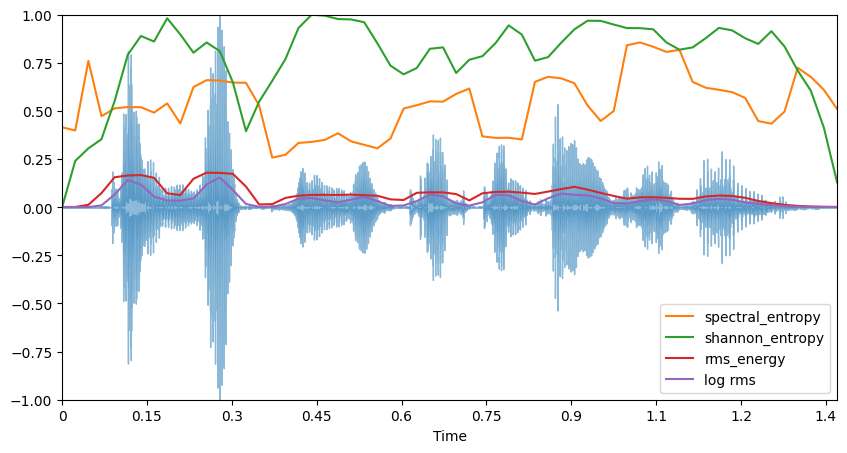

In [72]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'rms', 'rms_log'])

In [73]:
def threshold_entropy(y):
    thrd = np.mean(np.abs(y)) # threshold is the mean of the absolute signal 

    filtered_signal = np.array([1 if np.abs(val) >= thrd else 0 for val in y])
    frames = frames_gen(filtered_signal)
    frames = np.transpose(frames)
    return [np.mean(frame) for frame in frames]

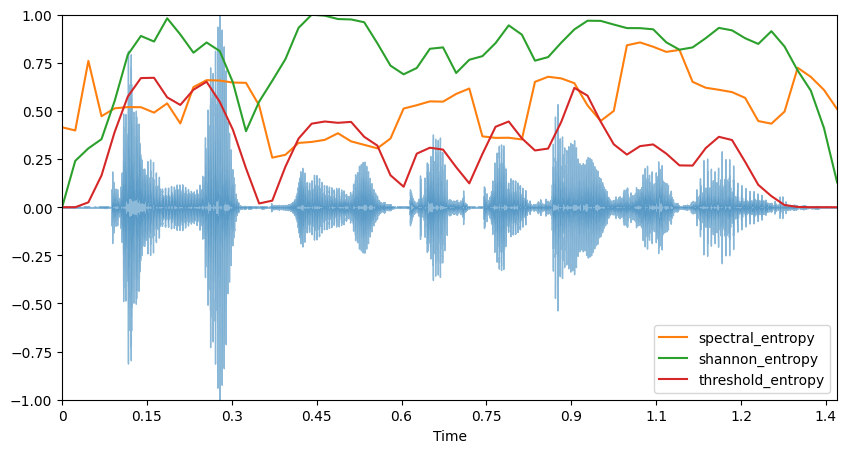

In [74]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

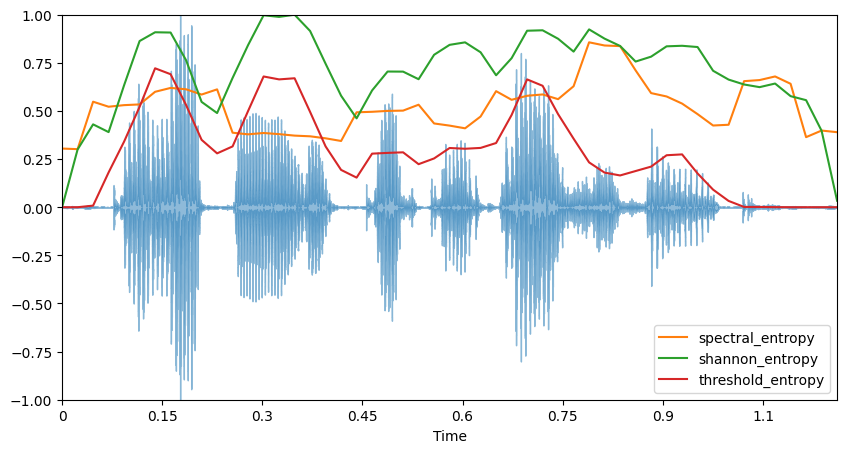

In [75]:
feature_visualization(audio2, sample_rate2, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

In [76]:
def threshold_entropy2(y): # as version 2
    thrd = 0.2 * np.max(np.abs(y))

    filtered_signal = np.array([1 if np.abs(val) >= thrd else 0 for val in y])
    frames = frames_gen(filtered_signal)
    frames = np.transpose(frames)
    return [np.mean(frame) for frame in frames]

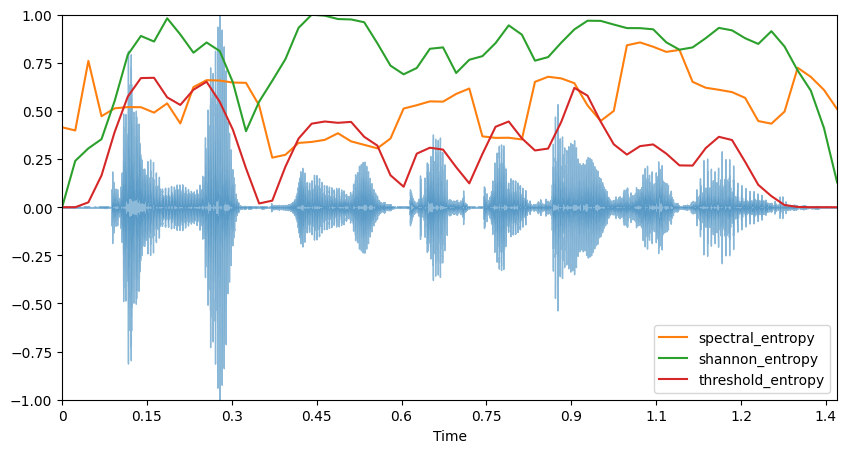

In [77]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

In [78]:
def log_energy_entropy(y):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    # 0 is ignored for log computation; otherwise we would get distorted results moving between 0 and 1!
    filtered_frames = [frame[frame != 0] for frame in frames] 
    log_entropy = np.nan_to_num([np.sum(np.log(np.square(frame))) for frame in filtered_frames]) 
    return normalize(log_entropy)

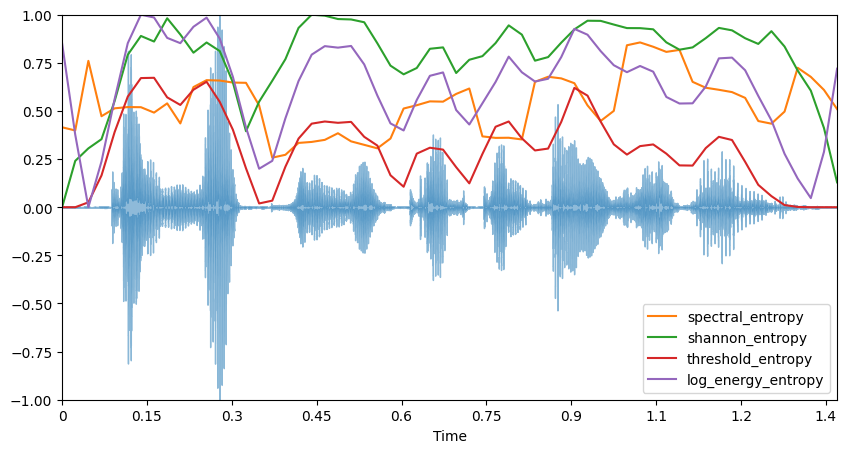

In [79]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy', 
                                             'log_energy_entropy'])

In [80]:
def sure_entropy(y, threshold=0.05):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    sure_ent = []
    
    for frame in frames: 
        hist, bin_edges = np.histogram(frame, bins=len(frame), density=True)
        probs = hist * np.diff(bin_edges)
        sure_ent.append(np.sum(np.minimum(probs, threshold)))

    return normalize(sure_ent)

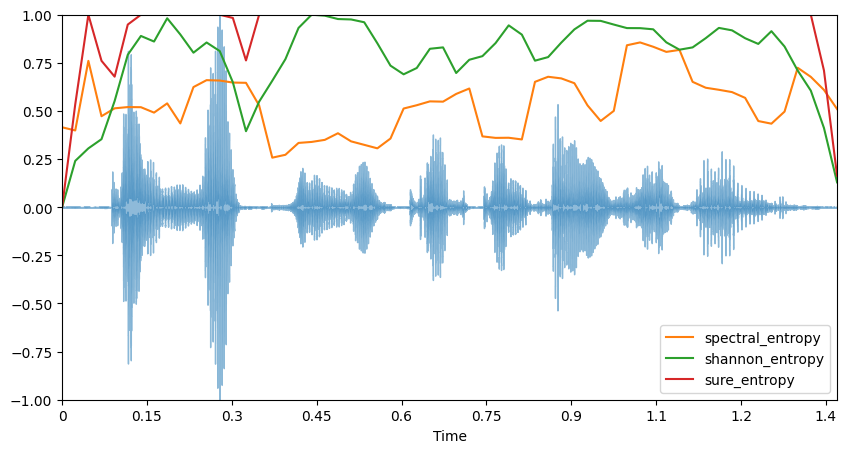

In [81]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'sure_entropy'])

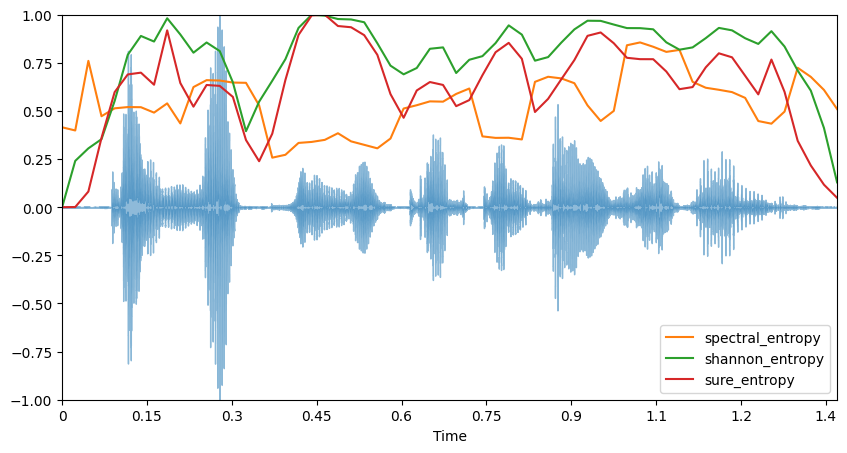

In [82]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'sure_entropy'], sure_threshold=0.0005)

# Statistical Features

In [83]:
def freq_statistics(y):
    """
    computes statistics
    """
    freqs = np.fft.fftfreq(y.size)
    
    mean = np.mean(freqs)
    median = np.median(freqs)
    std = np.std(freqs) 
    var = np.var(freqs)
    maxi = np.amax(freqs) 
    mini = np.amin(freqs) 
    
    return [mean, median, std, var, maxi, mini]

In [84]:
freq_statistics(audio1)

[-1.6462531278801943e-05,
 -1.646253127880943e-05,
 0.28867513443834236,
 0.08333333324299502,
 0.4999670749374424,
 -0.5]

In [85]:
freq_statistics(audio2)

[-1.939487975174251e-05,
 -1.9394879751745538e-05,
 0.288675134377636,
 0.0833333332079462,
 0.49996121024049645,
 -0.49999999999999994]

In [86]:
freq_statistics(audio3)

[-4.600307374273874e-18,
 0.0,
 0.2886751344654349,
 0.08333333325863691,
 0.4999850303883117,
 -0.4999850303883117]

# Preprocessing 
In [1]: noise filtering & normalization before feature extraction; in others: do not mention pre-processing -> only apply normalization or not at all because no big difference!?

In [87]:
audio2_norm = librosa.util.normalize(audio2)

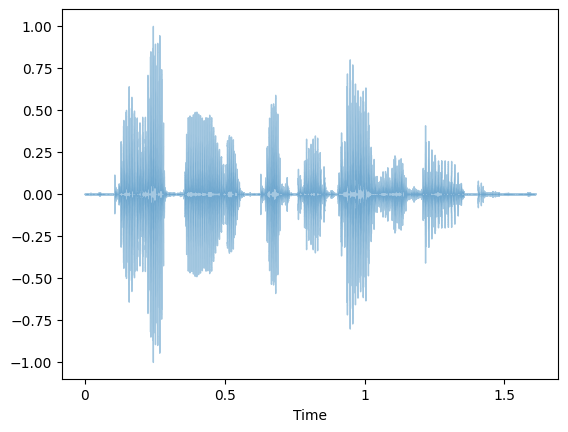

In [88]:
librosa.display.waveshow(audio2_norm, sr=sample_rate2, alpha=0.4)

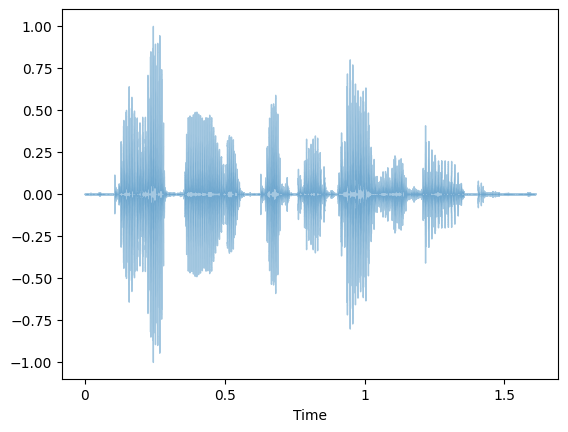

In [89]:
librosa.display.waveshow(audio2, sr=sample_rate2, alpha=0.4)

In [90]:
audio2_norm==audio2

array([False, False, False, ..., False, False, False])

In [91]:
audio2_norm[10]

0.00067148916

In [92]:
audio2[10]

0.0006713867

In [93]:
audio2.max()

0.93530273

In [94]:
audio2_norm.max()

0.9354455

In [95]:
audio1.max()

0.9999695

# LPC

In [97]:
def lpc(y, order=4):
    return librosa.lpc(y, order=order)

In [98]:
lpc(audio1).shape

(5,)

In [99]:
def visualize_lpc(y, order):
    """
    from https://librosa.org/doc/main/generated/librosa.lpc.html
    """
    a = librosa.lpc(y, order=order)
    b = np.hstack([[0], -1 * a[1:]])
    y_hat = scipy.signal.lfilter(b, [1], y)
    fig, ax = plt.subplots()
    ax.plot(y)
    ax.plot(y_hat, linestyle='--')
    ax.legend(['y', 'y_hat'])
    ax.set_title('LP Model Forward Prediction')
    plt.show()

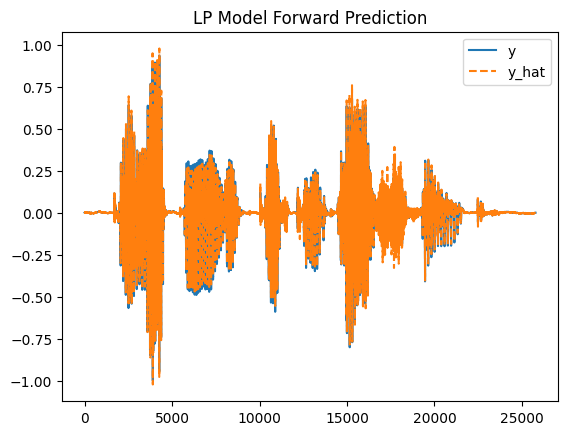

In [100]:
visualize_lpc(audio2, 16)

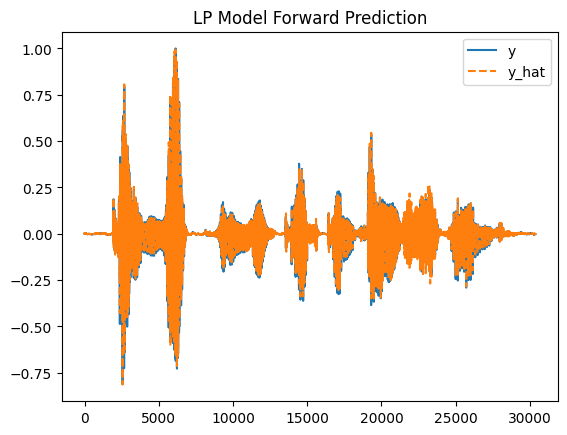

In [101]:
visualize_lpc(audio1, 16)

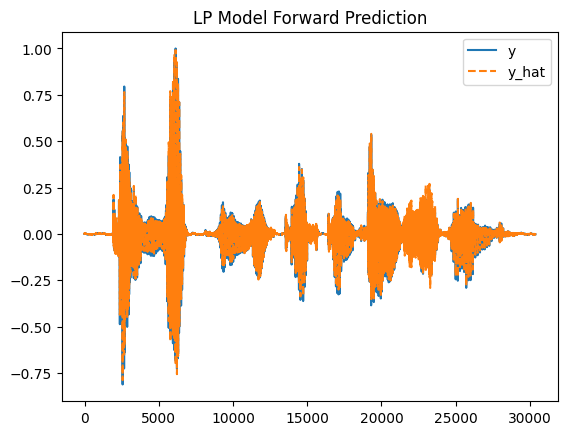

In [102]:
visualize_lpc(audio1, 4)

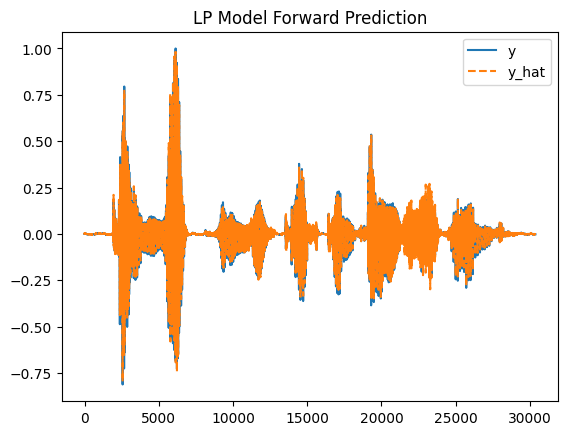

In [103]:
visualize_lpc(audio1, 5)

-> quite good estimation with order=4 achieved!

# Energy

In [104]:
def energy(y):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    ener = [np.sum(np.square(frame)) for frame in frames]
    
    return normalize(ener)

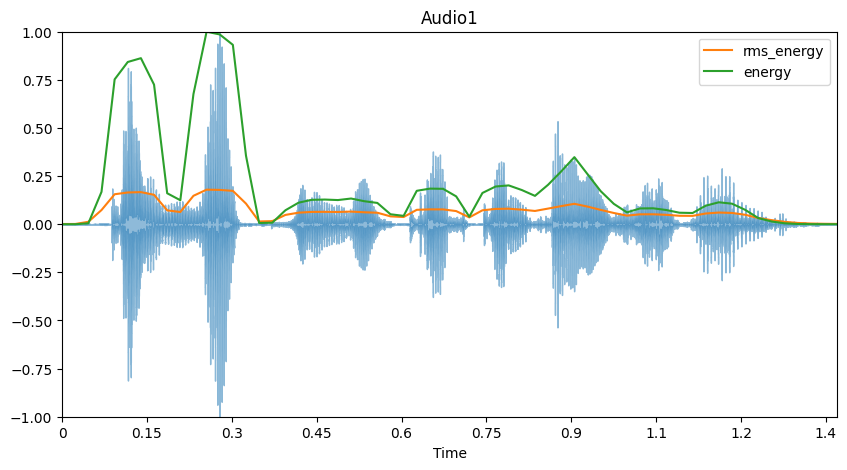

In [105]:
feature_visualization(audio1, sample_rate1, ['energy', 'rms'], 'Audio1')

In [106]:
def normalize(x):
    return sklearn.preprocessing.MinMaxScaler().fit_transform(np.array(x).reshape(-1,1))

In [107]:
scaler = sklearn.preprocessing.MinMaxScaler()

# Fundamental Frequency

In [111]:
def f0_comp(y, sr):
    f0, voiced_flag, voiced_prob = librosa.pyin(y=y, sr=sr, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), hop_length=512)
    f0 = np.nan_to_num(f0) # convert nan values to 0
    return f0, voiced_flag, voiced_prob

In [112]:
f0, voiced_flag, voiced_prob = f0_comp(audio1, sample_rate1)
f0

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       141.83073393, 140.20166901, 144.30989149, 161.98237639,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 234.43211036, 202.90956259,
       173.60841241, 165.76853496, 168.66611791, 223.84553226,
       227.75828325, 233.08188076, 241.30149553,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 188.23090565, 183.93170582, 181.81906999,
       171.61434972, 139.39416681, 159.19961612, 201.74088951,
       226.44649206, 249.8109744 , 260.11871293, 258.62053938,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 113.87914162, 112.57112812, 109.36644662,
       108.73654224,  99.71184888, 102.04250286, 100.87044475,
        96.31529725,   0.        ,   0.        ,   0.        ])

# Speech Spectrum

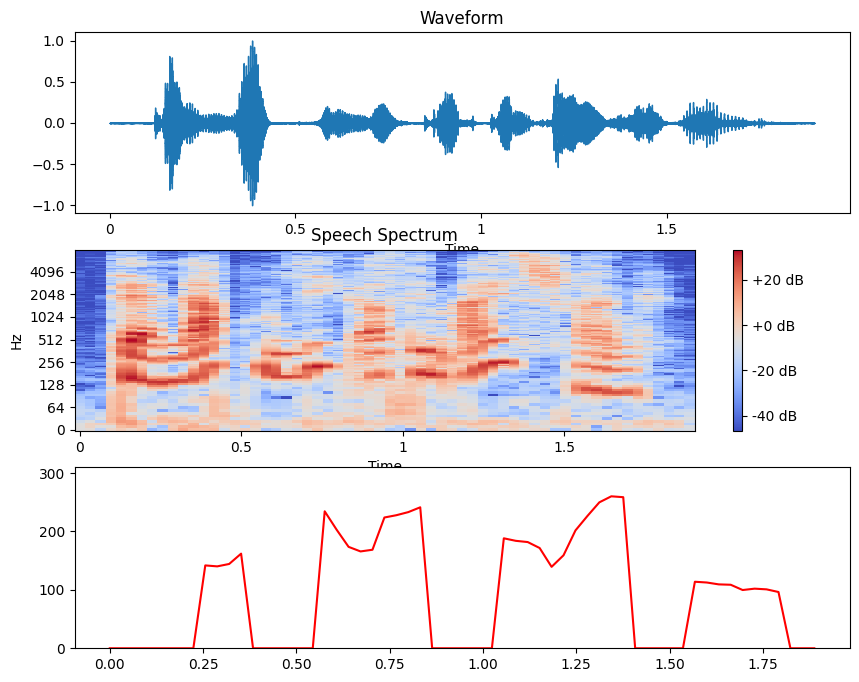

In [113]:
# Compute the speech spectrum
speech_spectrum = librosa.stft(audio1)

# Create the time and frequency axes for plotting
times = librosa.frames_to_time(range(speech_spectrum.shape[1]), sr=sample_rate1)
frequencies = librosa.fft_frequencies(sr=sample_rate1, n_fft=speech_spectrum.shape[0])

# Plot the waveform, speech spectrum, and F0
plt.figure(figsize=(10, 8))

# Waveform plot
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio1, sr=sample_rate1)
plt.title('Waveform')

# Speech Spectrum plot
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(speech_spectrum), x_axis='time', y_axis='log', sr=sample_rate1)
plt.colorbar(format='%+2.0f dB')
plt.title('Speech Spectrum')

# F0 plot
plt.subplot(3, 1, 3)
plt.plot(times, f0, label='Fundamental Frequency (F0)', color='r')
plt.ylim(0, max(f0) + 50)
plt.show()

When estimating the fundamental frequency with probabilistic YIN algorithm, we can see that we only get values where the algorithm estimates voiced sections.

In [114]:
times = librosa.times_like(f0)

In [115]:
def plot_spectrogram_f0(y):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
    ax.set(title='pYIN fundamental frequency estimation')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
    ax.legend(loc='upper right')

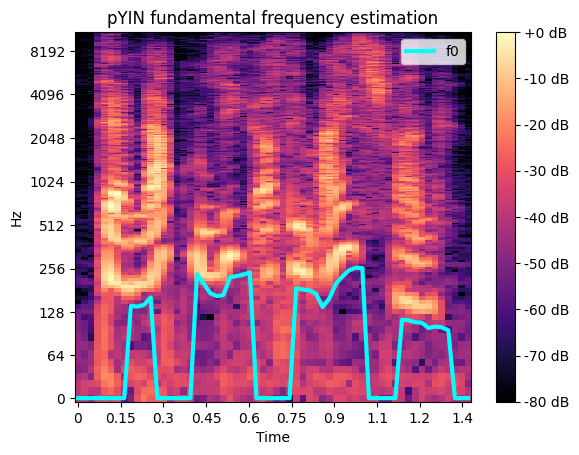

In [116]:
plot_spectrogram_f0(audio1)

In [117]:
f0 = f0[f0!=0]
f0

array([141.83073393, 140.20166901, 144.30989149, 161.98237639,
       234.43211036, 202.90956259, 173.60841241, 165.76853496,
       168.66611791, 223.84553226, 227.75828325, 233.08188076,
       241.30149553, 188.23090565, 183.93170582, 181.81906999,
       171.61434972, 139.39416681, 159.19961612, 201.74088951,
       226.44649206, 249.8109744 , 260.11871293, 258.62053938,
       113.87914162, 112.57112812, 109.36644662, 108.73654224,
        99.71184888, 102.04250286, 100.87044475,  96.31529725])

In [118]:
mean_f0 = np.mean(f0)
mean_f0

172.62866798717405

In [119]:
median_f0 = np.median(f0)
median_f0

170.14023381829912

In [120]:
# find the mode F0

# Discretize the F0 values (rounded to nearest integer)
discretized_f0 = np.round(f0)

# Count the occurrences
f0_counts = np.bincount(discretized_f0.astype(int))

# Find the mode F0
mode_f0 = np.argmax(f0_counts)

print("Mode F0:", mode_f0)

Mode F0: 109


# Formant detection using Praat
following https://github.com/drfeinberg/PraatScripts/blob/master/Measure%20Pitch%2C%20HNR%2C%20Jitter%2C%20Shimmer%2C%20and%20Formants.ipynb

In [121]:
import parselmouth 
from parselmouth import praat

In [122]:
audio1_praat = parselmouth.Sound(audio1_path) 

In [123]:
audio1_praat

In [124]:
# compute the formants
"""
from https://www.fon.hum.uva.nl/praat/manual/Sound__To_Formant__burg____.html
Time step (s): If you set the time step to 0.0 (the standard), Praat will use a time step that is equal to 25 percent of
the analysis window length
Maximum number of formants: usually 5
Formant ceiling (Hz): is speaker-dependent! for female 5500 Hz, for male rather 5000 Hz; crucial to set this value 
correct
Window length


The sound will be resampled to a sampling frequency of twice the value of Formant ceiling -> so usually should take the 
values below but to keep consistency maybe take 8000? but then not accurate!? 

Other values are okay!?


returns: a dictionary with median of formants!
"""
def formant_analysis(y_path, formant_order):
    y = parselmouth.Sound(y_path) # get the praat sound
    
    # compute the occurrences of periodic instances in the signal
    f0min=75
    f0max=600 # in the example it was 300; but here we see standard is 600 (https://www.fon.hum.uva.nl/praat/manual/Sound__To_Pitch__ac____.html)
    pointProcess = praat.call(y, "To PointProcess (periodic, cc)", f0min, f0max)
    
    # define maximal frequency 
    formant_ceiling = 5000

    formants = praat.call(y, "To Formant (burg)", 0.0025, 5, formant_ceiling, 0.025, 50) # formants definition
    
    # assign formant values with times where they make sense (periodic instances)
    numPoints = praat.call(pointProcess, "Get number of points")
    
    # define a dictionary to save the formants of the specified order and initialize with empty list
    form_dict = {}
    for order in range(1, formant_order+1):
        form_dict[order] = []

        for point in range(0, numPoints):
            point += 1
            t = praat.call(pointProcess, "Get time from index", point)
            formant = praat.call(formants, "Get value at time", order, t, 'Hertz', 'Linear')
            if str(formant) != 'nan':
                form_dict[order].append(formant)
        form_dict[order] = np.median(form_dict[order])
    
    return form_dict

In [125]:
formant_dict = formant_analysis(audio1_path, formant_order=4)
formant_dict

{1: 367.6153422440674,
 2: 1729.0118722080774,
 3: 2692.849025068226,
 4: 3718.263121661569}

In [126]:
formant_analysis(audio2_path, formant_order=4)

{1: 384.1957653830559,
 2: 1512.7309371243227,
 3: 2428.8124458639268,
 4: 3471.515166836066}

In [127]:
formant_analysis(audio3_path, formant_order=4)

{1: 478.72662870338615,
 2: 1559.1466604917346,
 3: 2614.72149562139,
 4: 3591.4016972489453}

In [128]:
def plot_spectrum_formants(signal, sr, formant_freqs, f0):
    """Plot speech spectrum with spectral envelope, formant frequencies, and f0 multiples."""
    frequencies = np.fft.rfftfreq(len(signal), d=1/sr)
    magnitudes = np.abs(np.fft.rfft(signal))

    # Smooth the speech spectrum using a simple moving average
    window_size = 10  # Adjust the window size as desired
    smoothed_magnitudes = np.convolve(magnitudes, np.ones(window_size)/window_size, mode='same')

    # Calculate the envelope of the smoothed spectrum
    envelope = np.abs(hilbert(smoothed_magnitudes))

    # Apply a low-pass filter to the envelope for additional smoothing
    cutoff_freq = 100  # Adjust the cutoff frequency as desired
    b, a = butter(4, cutoff_freq / (sr/2), btype='low')
    smoothed_envelope = filtfilt(b, a, envelope)

    # Find the peaks of the smoothed envelope
    peak_indices, _ = find_peaks(smoothed_envelope)

    plt.figure(figsize=(10, 5))
    plt.plot(frequencies, 20 * np.log10(smoothed_magnitudes), color='#1f77b4', label='Smoothed Speech Spectrum')
    plt.plot(frequencies, 20 * np.log10(smoothed_envelope), color='orangered', label='Smoothed Envelope')

    # Add markers at the formant frequencies
    for i, freq in enumerate(formant_freqs.values()):
        closest_peak_index = np.argmin(np.abs(frequencies[peak_indices] - freq))
        peak_freq = frequencies[peak_indices[closest_peak_index]]
        peak_magnitude = 20 * np.log10(smoothed_envelope[peak_indices[closest_peak_index]])
        plt.plot(peak_freq, peak_magnitude, 'ro')
        plt.text(peak_freq, peak_magnitude + 3, f'F{i+1}', ha='center', va='bottom')

    # Add lines for f0 and its integer multiples
    multiples = range(1, int(4000 / f0) + 1)  # Adjust the range as desired
    for multiple in multiples:
        f0_multiple = f0 * multiple
        plt.axvline(x=f0_multiple, ymin=0.13, ymax=1, color='gray', linestyle='--', linewidth=0.5)
        plt.text(f0_multiple, -9, f'{multiple}xF0', ha='center', va='bottom', rotation='vertical')

    # Set the limits of the axes to fit the data
    plt.xlim(0, 4000)
    plt.ylim(-10, 40)

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('../results/visualizations/speech_spectrum_formants.png')
    plt.savefig('../results/visualizations/speech_spectrum_formants.svg')
    plt.show()

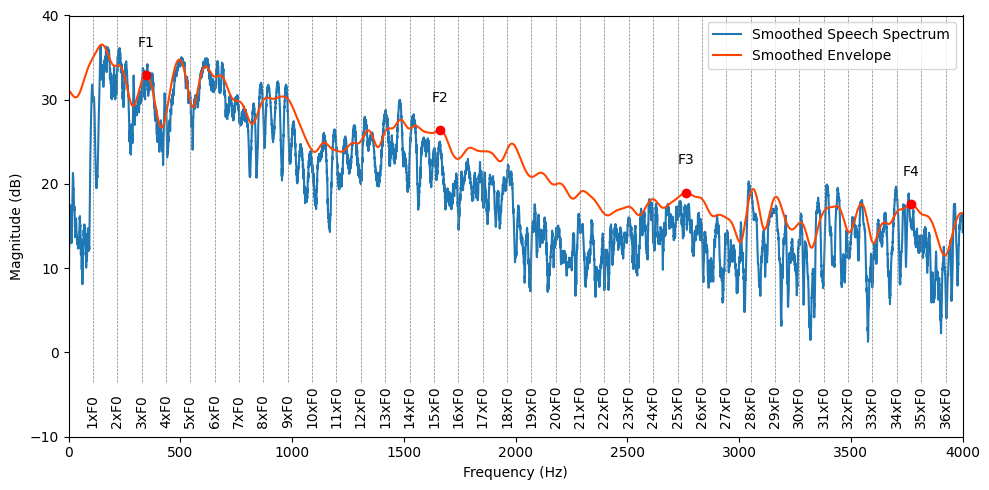

In [129]:
plot_spectrum_formants(audio1, sample_rate1, formant_dict, mode_f0)

In [130]:
def calculate_f0(signal, sr):
    """Calculate the fundamental frequency (F0) using autocorrelation."""
    # Calculate the autocorrelation of the signal
    autocorr = np.correlate(signal, signal, mode='full')

    # Find the index of the maximum value in the autocorrelation (excluding the zero lag)
    start = int(sr/500)  # Exclude the first 2ms (assuming the minimum F0 is 100 Hz)
    end = int(sr/75)    # Exclude the first 13.3ms (assuming the maximum F0 is 1500 Hz)
    peak_index = np.argmax(autocorr[start:end]) + start

    # Calculate the fundamental frequency (F0) in Hz
    f0 = sr / peak_index

    return f0

# Example usage
f0 = calculate_f0(audio1, sample_rate1)
multiples = [f0 * i for i in range(1, 6)]  # Calculate F0 multiples up to 5x

print("Fundamental Frequency (F0):", f0)
print("F0 Multiples:", multiples)


Fundamental Frequency (F0): 75.47169811320755
F0 Multiples: [75.47169811320755, 150.9433962264151, 226.41509433962267, 301.8867924528302, 377.35849056603774]


In [131]:
def plot_spectrogram_with_formants(signal, sr, formant_freqs, name, save=False):
    
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(spectrogram, sr=sr, y_axis="log", x_axis="time", cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    
    # Add markers for the formant frequencies
    for formant_freq in formant_freqs.values():
        plt.axhline(y=formant_freq, color='white', linestyle='--', linewidth=1)
    
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    
    if save: 
        plt.savefig('../results/visualizations/spectrogram_formants.png')
        plt.savefig('../results/visualizations/spectrogram_formants.svg')
    else:
        plt.title(f"Spectrogram with Formant Markers for {name}")
    plt.show()

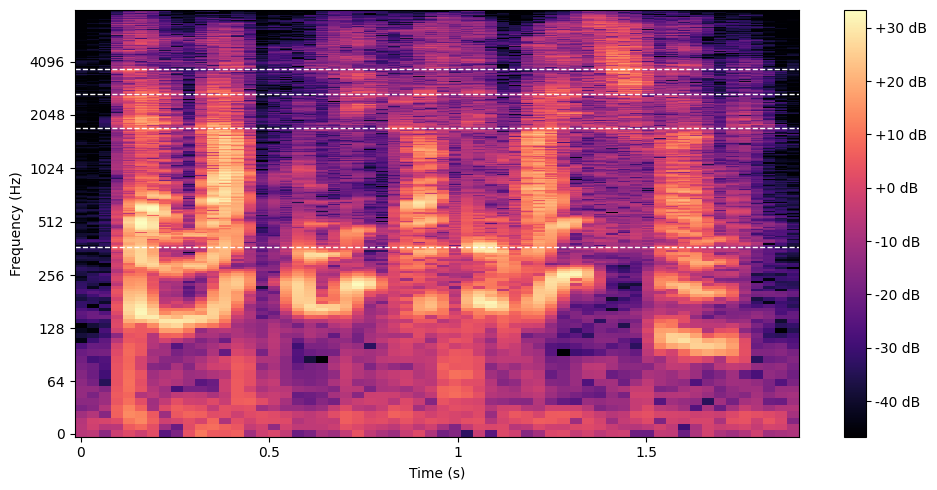

In [132]:
plot_spectrogram_with_formants(audio1, sr=sample_rate1, formant_freqs=formant_dict, name='Audio 1', save=True)

# Pitch
The fundamental frequency is closely related to pitch, which is defined as our perception of fundamental frequency. That is, the F0 describes the actual physical phenomenon, whereas pitch describes how our ears and brains interpret the signal, in terms of periodicity.

Code mainly from https://readthedocs.org/projects/parselmouth/downloads/pdf/latest/

In [133]:
pitch = audio1_praat.to_pitch()
pitch

In [134]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
    plt.ylabel("fundamental frequency [Hz]")

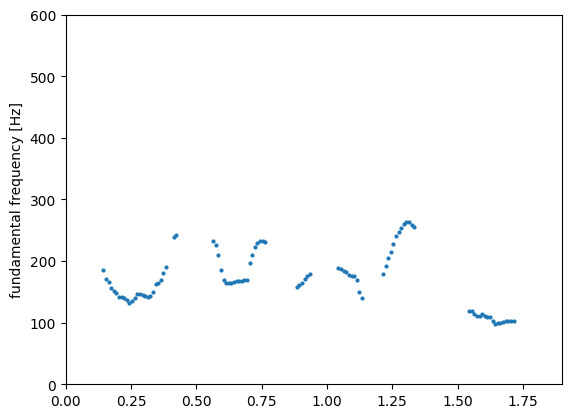

In [135]:
draw_pitch(pitch)

In [136]:
f0

75.47169811320755

In [137]:
pitch.selected_array['frequency']

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       185.34606525, 170.3098038 , 165.47517704, 155.489495  ,
       151.87689735, 147.66003206, 142.26017366, 141.74923876,
       140.8298368 , 136.98709291, 132.17649185, 135.81295366,
       140.86268246, 146.07280778, 146.58613352, 145.03320345,
       142.9515135 , 141.98552102, 143.2778601 , 149.55875314,
       162.81678364, 165.16797284, 168.78917972, 180.29984134,
       189.72727527,   0.        ,   0.        , 239.52009115,
       241.93067101,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 232.74985533, 226.30217742,
       209.87001708, 185.49827491, 169.79369835, 165.18904739,
       164.82221175, 164.99029791, 165.86511661, 168.03

In [138]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

In [139]:
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

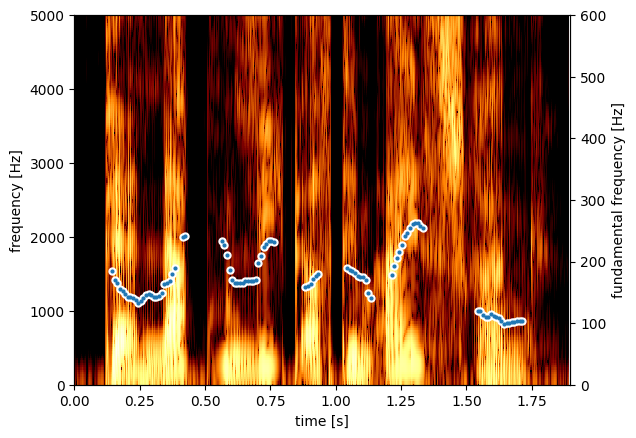

In [140]:
intensity = audio1_praat.to_intensity()
spectrogram = audio1_praat.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
plt.show()

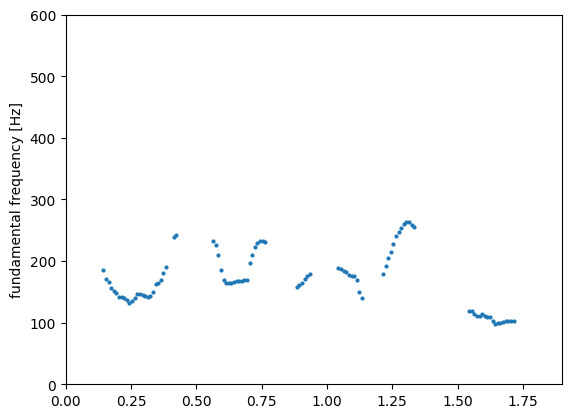

In [141]:
draw_pitch(pitch)

In [142]:
pre_emphasized_snd = audio1_praat.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)

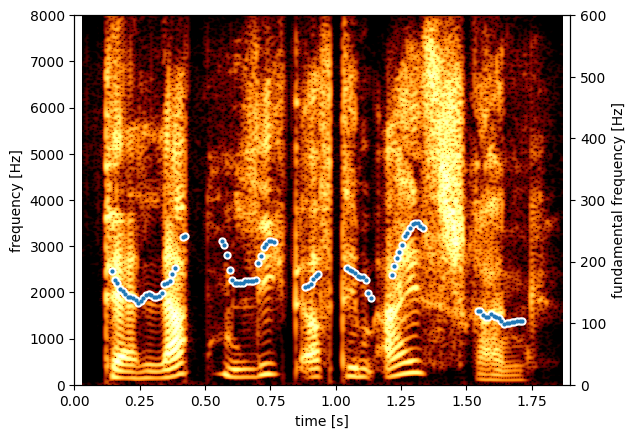

In [143]:
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
plt.show()

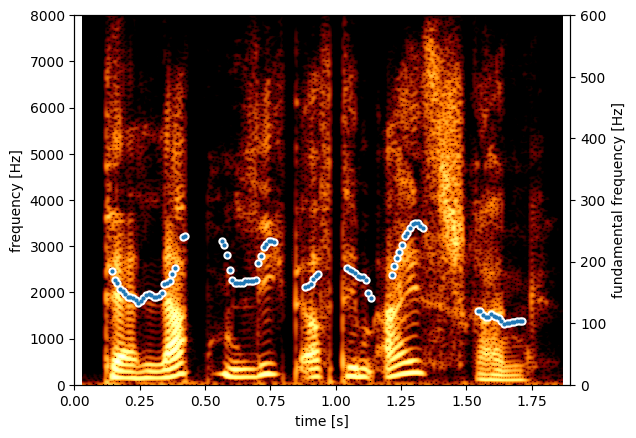

In [144]:
spectrogram = audio1_praat.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
plt.show()

-> pre-emphasize seems nicer!

In [145]:
pitch = audio1_praat.to_pitch()
pitch_values = pitch.selected_array['frequency']
print("The maximum pitch frequency is = {maximum} Hz , at time t = {time} seconds".format(maximum = np.nanmax(pitch_values), time =  pitch.xs()[np.nanargmax(pitch_values)]))
print("The minimum pitch frequency is = {minimum} Hz , at time t = {time} seconds".format(minimum = np.nanmin(pitch_values), time =  pitch.xs()[np.nanargmin(pitch_values)]))

The maximum pitch frequency is = 263.084839437405 Hz , at time t = 1.314125 seconds
The minimum pitch frequency is = 0.0 Hz , at time t = 0.02412499999999995 seconds


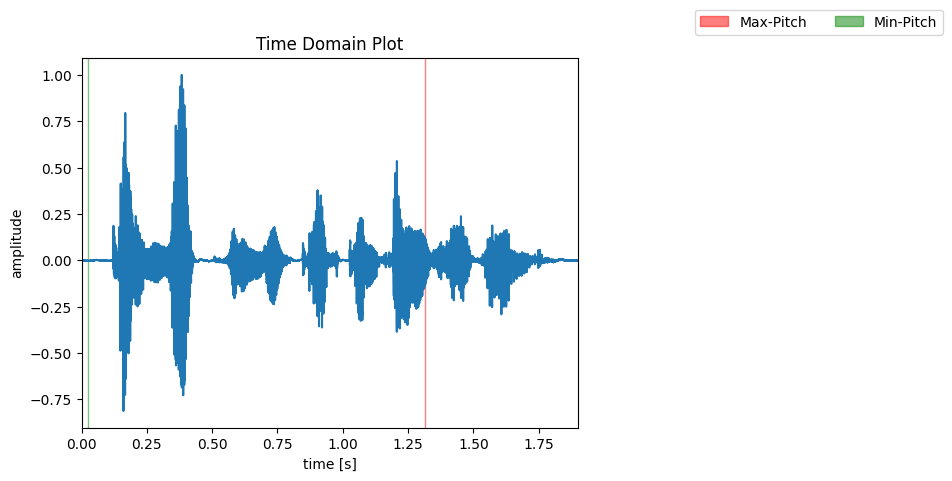

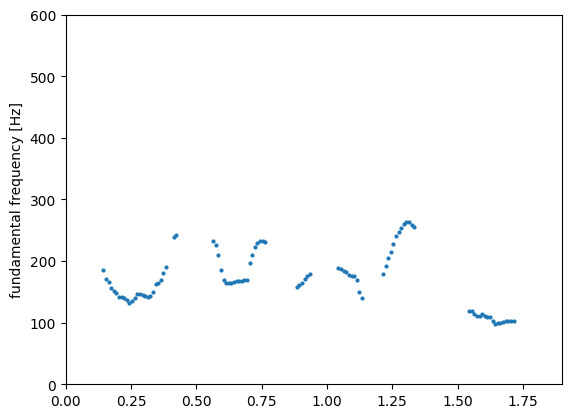

In [146]:
plt.figure()
plt.plot(audio1_praat.xs(), audio1_praat.values.T)
plt.xlim([audio1_praat.xmin, audio1_praat.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.axvspan(1.314,1.316, color = 'red', alpha = 0.5, label = "Max-Pitch")
plt.axvspan(0.024,0.026, color = 'green' , alpha = 0.5, label = "Min-Pitch" )

plt.legend(bbox_to_anchor =(1.75, 1.15), ncol = 2) 
plt.title('Time Domain Plot')
plt.show()

draw_pitch(pitch)

# Speed of speech (speaking rate) 
from https://github.com/drfeinberg/PraatScripts/blob/master/syllable_nuclei.py based on De Jong, N.H. & Wempe, T. (2009). Praat script to detect syllable nuclei and measure speech rate automatically. Behavior research methods, 41 (2), 385 - 390. 

In [147]:
from parselmouth.praat import call

def speech_rate(filename):
    silencedb = -25
    mindip = 2
    minpause = 0.3
    sound = parselmouth.Sound(filename)
    originaldur = sound.get_total_duration()
    intensity = sound.to_intensity(50)
    start = call(intensity, "Get time from frame number", 1)
    nframes = call(intensity, "Get number of frames")
    end = call(intensity, "Get time from frame number", nframes)
    min_intensity = call(intensity, "Get minimum", 0, 0, "Parabolic")
    max_intensity = call(intensity, "Get maximum", 0, 0, "Parabolic")

    # get .99 quantile to get maximum (without influence of non-speech sound bursts)
    max_99_intensity = call(intensity, "Get quantile", 0, 0, 0.99)

    # estimate Intensity threshold
    threshold = max_99_intensity + silencedb
    threshold2 = max_intensity - max_99_intensity
    threshold3 = silencedb - threshold2
    if threshold < min_intensity:
        threshold = min_intensity

    # get pauses (silences) and speakingtime
    textgrid = call(intensity, "To TextGrid (silences)", threshold3, minpause, 0.1, "silent", "sounding")
    silencetier = call(textgrid, "Extract tier", 1)
    silencetable = call(silencetier, "Down to TableOfReal", "sounding")
    npauses = call(silencetable, "Get number of rows")
    speakingtot = 0
    for ipause in range(npauses):
        pause = ipause + 1
        beginsound = call(silencetable, "Get value", pause, 1)
        endsound = call(silencetable, "Get value", pause, 2)
        speakingdur = endsound - beginsound
        speakingtot += speakingdur

    intensity_matrix = call(intensity, "Down to Matrix")
    # sndintid = sound_from_intensity_matrix
    sound_from_intensity_matrix = call(intensity_matrix, "To Sound (slice)", 1)
    # use total duration, not end time, to find out duration of intdur (intensity_duration)
    # in order to allow nonzero starting times.
    intensity_duration = call(sound_from_intensity_matrix, "Get total duration")
    intensity_max = call(sound_from_intensity_matrix, "Get maximum", 0, 0, "Parabolic")
    point_process = call(sound_from_intensity_matrix, "To PointProcess (extrema)", "Left", "yes", "no", "Sinc70")
    # estimate peak positions (all peaks)
    numpeaks = call(point_process, "Get number of points")
    t = [call(point_process, "Get time from index", i + 1) for i in range(numpeaks)]

    # fill array with intensity values
    timepeaks = []
    peakcount = 0
    intensities = []
    for i in range(numpeaks):
        value = call(sound_from_intensity_matrix, "Get value at time", t[i], "Cubic")
        if value > threshold:
            peakcount += 1
            intensities.append(value)
            timepeaks.append(t[i])

    # fill array with valid peaks: only intensity values if preceding
    # dip in intensity is greater than mindip
    validpeakcount = 0
    currenttime = timepeaks[0]
    currentint = intensities[0]
    validtime = []

    for p in range(peakcount - 1):
        following = p + 1
        followingtime = timepeaks[p + 1]
        dip = call(intensity, "Get minimum", currenttime, timepeaks[p + 1], "None")
        diffint = abs(currentint - dip)
        if diffint > mindip:
            validpeakcount += 1
            validtime.append(timepeaks[p])
        currenttime = timepeaks[following]
        currentint = call(intensity, "Get value at time", timepeaks[following], "Cubic")

    # Look for only voiced parts
    pitch = sound.to_pitch_ac(0.02, 30, 4, False, 0.03, 0.25, 0.01, 0.35, 0.25, 450)
    voicedcount = 0
    voicedpeak = []

    for time in range(validpeakcount):
        querytime = validtime[time]
        whichinterval = call(textgrid, "Get interval at time", 1, querytime)
        whichlabel = call(textgrid, "Get label of interval", 1, whichinterval)
        value = pitch.get_value_at_time(querytime) 
        if not math.isnan(value):
            if whichlabel == "sounding":
                voicedcount += 1
                voicedpeak.append(validtime[time])

    # calculate time correction due to shift in time for Sound object versus
    # intensity object
    timecorrection = originaldur / intensity_duration

    # Insert voiced peaks in TextGrid
    call(textgrid, "Insert point tier", 1, "syllables")
    for i in range(len(voicedpeak)):
        position = (voicedpeak[i] * timecorrection)
        call(textgrid, "Insert point", 1, position, "")

    # return results
    speakingrate = voicedcount / originaldur
    articulationrate = voicedcount / speakingtot
    npause = npauses - 1
    asd = speakingtot / voicedcount
    speechrate_dictionary = {'soundname':filename,
                             'nsyll':voicedcount,
                             'npause': npause,
                             'dur(s)':originaldur,
                             'phonationtime(s)':intensity_duration,
                             'speechrate(nsyll / dur)': speakingrate,
                             "articulation rate(nsyll / phonationtime)":articulationrate,
                             "ASD(speakingtime / nsyll)":asd}
    return speechrate_dictionary

In [148]:
speech_rate(audio1_path)

{'soundname': '../data/emodb\\wav/03a01Fa.wav',
 'nsyll': 6,
 'npause': 0,
 'dur(s)': 1.89825,
 'phonationtime(s)': 1.89825,
 'speechrate(nsyll / dur)': 3.1608060055314104,
 'articulation rate(nsyll / phonationtime)': 3.1608060055314104,
 'ASD(speakingtime / nsyll)': 0.316375}

In [149]:
speech_rate(audio2_path)

{'soundname': '../data/emodb\\wav/03a01Nc.wav',
 'nsyll': 6,
 'npause': 0,
 'dur(s)': 1.61125,
 'phonationtime(s)': 1.61125,
 'speechrate(nsyll / dur)': 3.7238169123351432,
 'articulation rate(nsyll / phonationtime)': 3.7238169123351432,
 'ASD(speakingtime / nsyll)': 0.2685416666666667}

# Brightness (spectral centroid)
spectral centroid measures brightness of the sound; it is the centre of gravity of the magnitude spectrum, the frequency band where most of the energy is concentrated (see https://github.com/kimlindner/AudioSignalProcessingForML/)

In [150]:
def spectral_centroid(y, sr, frame_length=2048, hop_length=512):
    spectral_cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=frame_length, hop_length=hop_length)[0]
    return normalize(spectral_cent)

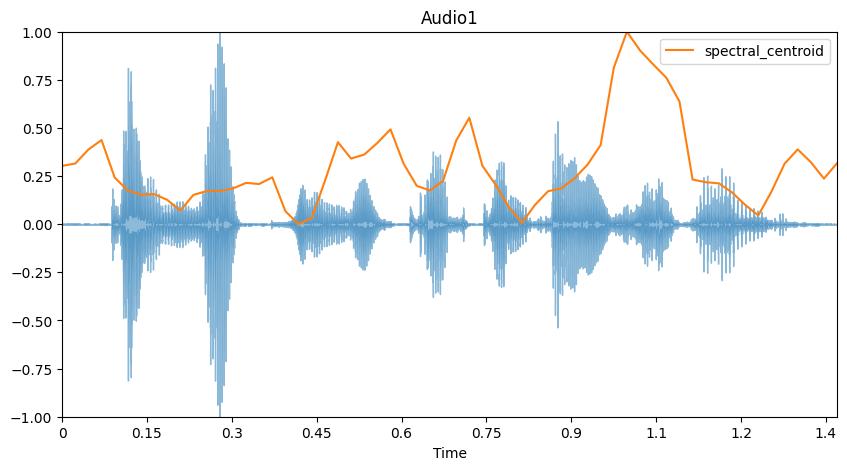

In [151]:
feature_visualization(audio1, sample_rate1, ['spectral_centroid'], 'Audio1')

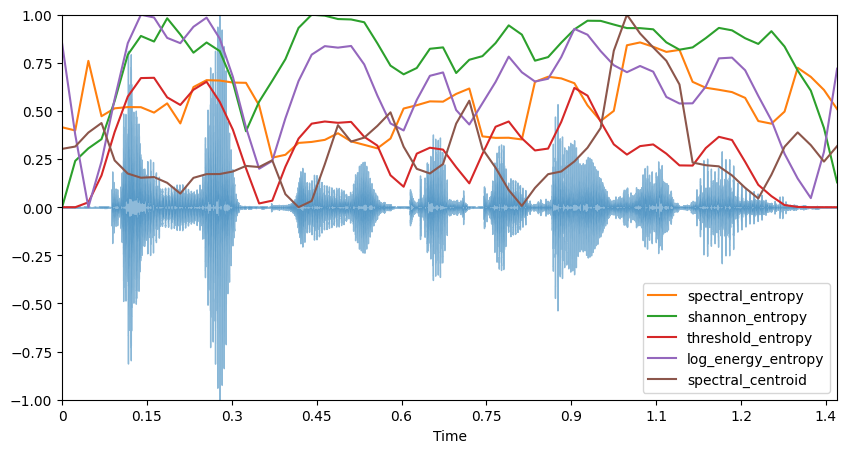

In [152]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy', 
                                             'log_energy_entropy', 'spectral_centroid'])

# MFCCs

In [153]:
def mfcc_comp(y, sr, number, window):
    return librosa.feature.mfcc(y=y, n_mfcc=number, sr=sr, window=window)

In [154]:
# visualizing MFCCs
def mfcc_visualization(mfccs, sr, title=None):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(mfccs, x_axis="time", sr=sr)
    plt.colorbar(format="%+2.f")
    plt.title('MFCCs ' + '{}'.format(title))
    plt.show()

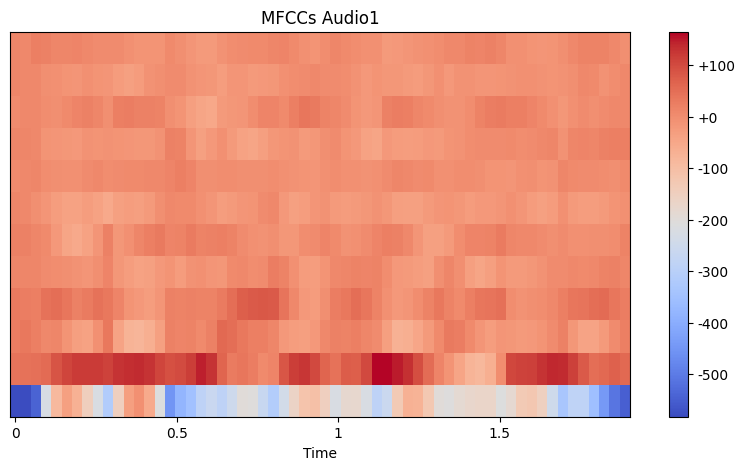

In [155]:
mfcc_visualization(mfcc_comp(audio1, sample_rate1, 12, window='hann'), sample_rate1, title='Audio1')

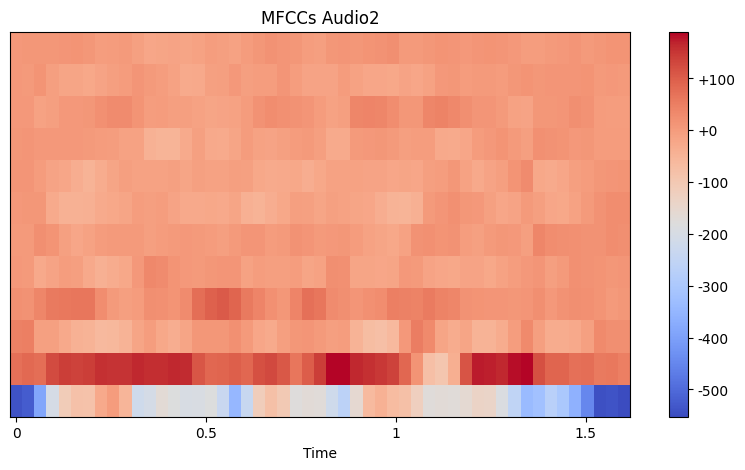

In [156]:
mfcc_visualization(mfcc_comp(audio2, sample_rate2, 12, 'hann'), sample_rate2, title='Audio2')

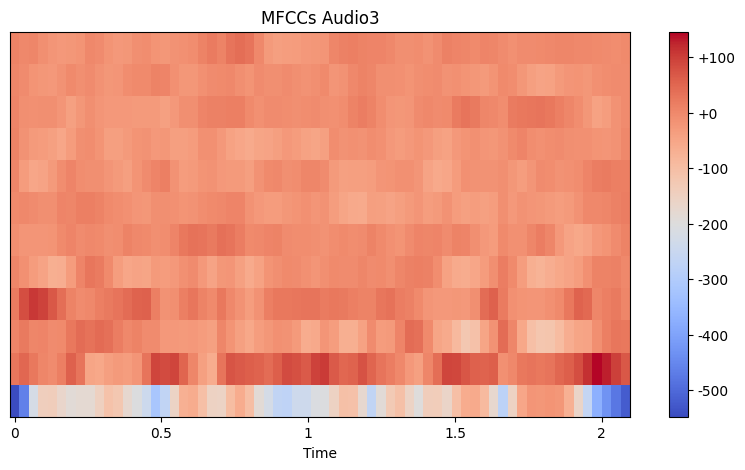

In [157]:
mfcc_visualization(mfcc_comp(audio3, sample_rate3, 12, 'hann'), sample_rate3, title='Audio3')

### compare Hann window (default) to Hamming window

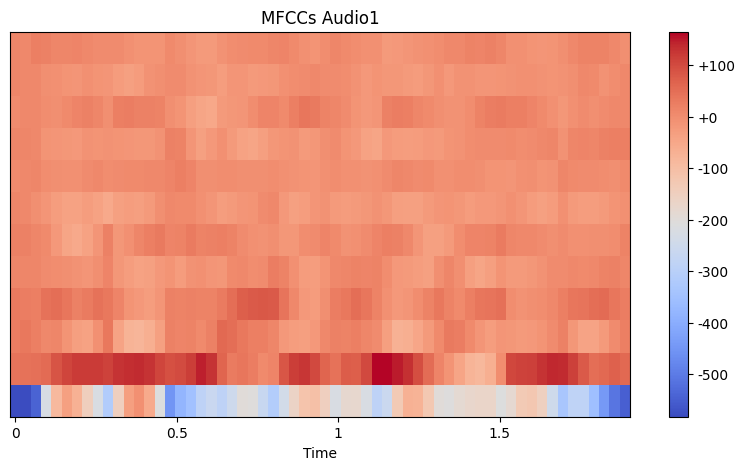

In [159]:
mfcc_visualization(mfcc_comp(audio1, sample_rate1, 12, window='hann'), sample_rate1, title='Audio1')

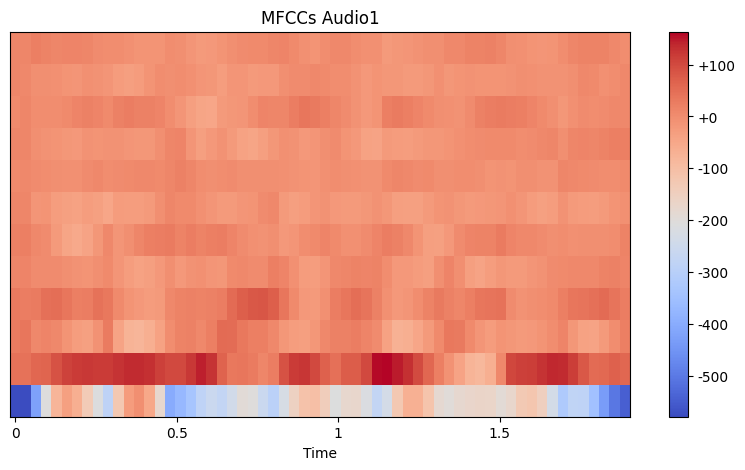

In [160]:
mfcc_visualization(mfcc_comp(audio1, sample_rate1, 12, window='hamming'), sample_rate1, title='Audio1')

There is no big difference between Hann and Hamming window. This gets clear when looking at the functions: 
- Hann window: $w(n) = 0.5 - 0.5 \cos\big(\frac{2\pi n}{M -1}\big),  0 \leq n \leq M-1$
- Hamming window: $w(n) = 0.54 - 0.46 \cos\big(\frac{2\pi n}{M -1}\big),  0 \leq n \leq M-1$

We decide to leave it to the default Hann window even though we read more about Hamming window. Librosa is using Hann window by default, and they are both "bell" like functions to smooth the beginning and ending of the signal with only slight changes in stremgth.

# Average Change Rate

In [161]:
f0

75.47169811320755

In [162]:
t = librosa.frames_to_time(range(feature_length_computation(audio1, sample_rate1, hop_length=512, frame_length=2048)
                                    ), hop_length=512)

In [163]:
t

array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
       0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
       0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
       0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
       0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
       0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
       0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
       0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
       0.92879819, 0.95201814, 0.9752381 , 0.99845805, 1.021678  ,
       1.04489796, 1.06811791, 1.09133787, 1.11455782, 1.13777778,
       1.16099773, 1.18421769, 1.20743764, 1.2306576 , 1.25387755,
       1.27709751, 1.30031746, 1.32353741, 1.34675737, 1.36997732])

# LPCC
Test with code from: https://www.kaggle.com/code/sourabhy/working-with-speech-part-2

In [165]:
def autocorr(self, order=None):
    if order is None:
        order = len(self) - 1
    return [sum(self[n] * self[n + tau] for n in range(len(self) - tau)) for tau in range(order + 1)]

In [166]:
def core_lpcc(seq, err_term, order=None):
    if order is None:
        order = len(seq) - 1
    lpcc_coeffs = [np.log(err_term), -seq[0]]
    for n in range(2, order + 1):
        # Use order + 1 as upper bound for the last iteration
        upbound = (order + 1 if n > order else n)
        lpcc_coef = -sum(i * lpcc_coeffs[i] * seq[n - i - 1]
                         for i in range(1, upbound)) * 1. / upbound
        lpcc_coef -= seq[n - 1] if n <= len(seq) else 0
        lpcc_coeffs.append(lpcc_coef)
    return lpcc_coeffs

In [167]:
def lpcc(lpcorder=None, cepsorder=None):
    coefs =  librosa.lpc(lpcorder, order=cepsorder)
    acseq =  np.array(autocorr(lpcorder, cepsorder))
    err_term =np.sqrt( acseq[0] + sum(a * c for a, c in zip(acseq[1:], coefs)))
    return core_lpcc(coefs, err_term, cepsorder)

In [168]:
lpccs = lpcc(audio1,16)
lpccs

[2.7347583744194774,
 -1.0,
 1.9801130294799805,
 -2.7814578612645464,
 4.654842294691207,
 -7.9603229968252665,
 13.991526283221013,
 -25.377648888465917,
 46.59124821330684,
 -86.87757578656215,
 164.0099341792405,
 -312.53515188713874,
 600.6136712796778,
 -1162.331724057408,
 2262.660217378642,
 -4427.321422862548,
 8701.413380453869]

# LPCMCCs

In [169]:
# lpccs
# lpccs
def autocorr(self, order=None):
    """
    code from https://www.kaggle.com/code/sourabhy/working-with-speech
    :param self:
    :param order:
    :return:
    """
    if order is None:
        order = len(self) - 1
    return [sum(self[n] * self[n + tau] for n in range(len(self) - tau)) for tau in range(order + 1)]

### sieht so bisschen aus wie absolut berechnet; in anderen Beispielen durch Länge und Varianz geteilt (normalisiert)


def core_lpcc(seq, err_term, order=None):
    """
    code mainly from https://www.kaggle.com/code/sourabhy/working-with-speech, slight changes
    :param seq:
    :param err_term:
    :param order:
    :return:
    """
    if order is None:
        order = len(seq) - 1
    lpcc_coeffs = [np.log(err_term), -seq[0]] # lpcc coeffs for i=0,1
    for n in range(2, order): # lpcc coeffs for i=2,...,order-1 of lpccs
        # Use order as upper bound for the last iteration (want 0,...,order-1 lpccs)
        upbound = (order if n > order - 1 else n)
        lpcc_coef = -sum(i * lpcc_coeffs[i] * seq[n - i - 1]
                         for i in range(1, upbound)) * 1. / upbound # sum over upper bound - 1
        lpcc_coef -= seq[n - 1] if n <= len(seq) else 0 # for both cases (m<p and m>p)
        lpcc_coeffs.append(lpcc_coef)
    return lpcc_coeffs


def lpcc(y, cepsorder):
    """
    code from https://www.kaggle.com/code/sourabhy/working-with-speech but changed compuation of error term
    :param lpcorder:
    :param cepsorder:
    :return:
    """
    coefs =  librosa.lpc(y, order=cepsorder)
    acseq =  np.array(autocorr(y, cepsorder))
    # err_term = np.sqrt(acseq[0] + sum(a * c for a, c in zip(acseq[1:], coefs)))
    b = np.hstack([[0], -1 * coefs[1:]])
    y_hat = scipy.signal.lfilter(b, [1], y)
    err_term = np.sum(np.square(y - y_hat)) # computation from librosa source code
    return core_lpcc(coefs, err_term, cepsorder)

In [170]:
lpccs = lpcc(audio1, cepsorder=12)

In [171]:
# code for LPCMFCC computation
def lpcmfcc_comp(lpccs, alpha=0.35, order_n=None):
    """
    computes LPCMFCCs based on the given LPCC coefficients recursively with order_n iterations going down
    :param lpccs: list of size cepsorder; computed LPCC coefficients
    :param alpha: float; usually between 0.31 and 0.35 to be close to Mel scale
    :param order_n: int; number of iterations, generally equal to order of LPCCs
    :return: list of size cepsorder; LPCMFCC coefficients from last iteration at n=0
    """
    order_k = len(lpccs)
    if order_n == None:
        order_n = order_k

    # initialize MCs(n) at iteration n = k (use order - 1 because we are going from 0)
    melcep_coefs = [lpccs[order_n - 1]]
    melcep_coefs.extend(np.zeros(order_k - 1))

    for n in range(order_n - 2, -1, -1):  # order_n iterations going down to 0
        melcep_coefs_old = melcep_coefs.copy()
        melcep_coefs[0] = lpccs[n] + alpha * melcep_coefs_old[0]
        melcep_coefs[1] = (1 - alpha) ** 2 * melcep_coefs_old[0] + alpha * melcep_coefs_old[1]
        for k in range(2, order_k):  # order_k coefficients to compute
            melcep_coefs[k] = melcep_coefs_old[k - 1] + alpha * (melcep_coefs_old[k] - melcep_coefs[k - 1])

    return melcep_coefs

In [172]:
lpcmfcc_comp(lpccs)

[2.910989674177653,
 -0.09387157742634208,
 0.09411503793467563,
 -1.8455160287593584,
 -6.710592866187602,
 -22.208788733049577,
 -40.63556727979497,
 -40.00206722251726,
 3.281477144228795,
 32.04202094872589,
 -2.1772497431853957,
 -29.56288196473439]

# "spectral energy dynamic coefficients of 12 equally spaced frequency bands"
MFCC are calculated on a Mel scale
idea for equally spaced: instead of Mel scale, i.e. melspectrogram in MFCCs use a "normal" spectrogram

In [173]:
S = librosa.amplitude_to_db(np.abs(librosa.stft(audio1, hop_length=HOP_LENGTH, n_fft=FRAME_LENGTH)),
                            ref=np.max)

In [174]:
import torchaudio
from torchaudio.transforms import LFCC
# https://pytorch.org/audio/main/generated/torchaudio.transforms.LFCC.html

In [175]:
waveform, sample_rate = torchaudio.load(audio1_path)

In [176]:
lfccs = LFCC(sample_rate=sample_rate, n_lfcc = 12, speckwargs={"n_fft": FRAME_LENGTH, "hop_length": HOP_LENGTH, 
                                                           'pad_mode':'constant'})(waveform)
# just had to change pad_mode from "reflect" to "constant" to be fully consistent with librosa

lfccs

tensor([[[-4.0512e+02, -4.0327e+02, -3.6889e+02, -6.8647e+01,  5.1243e+01,
           8.4041e+01,  4.0085e+01, -3.5461e+01, -1.0582e+02, -1.7747e+02,
          -4.7444e+01,  5.2602e+01,  7.4584e+01,  3.5111e+01, -9.7461e+01,
          -3.1285e+02, -2.4885e+02, -2.2836e+02, -1.8788e+02, -1.4817e+02,
          -1.1442e+02, -6.0613e+01, -2.0385e+01, -2.4814e+01, -6.9360e+01,
          -1.2844e+02, -1.0855e+02, -5.1632e+01, -7.4015e+00,  2.2926e+01,
           9.8274e+00, -4.7837e+01, -2.9298e+01, -2.2334e+01, -9.0374e+01,
          -1.9962e+02, -1.8213e+02, -5.4396e+01,  1.7760e+01,  4.6417e+01,
           3.0270e+01, -3.4021e+00,  1.3976e+01,  5.0649e+01,  7.1331e+01,
           7.3256e+01,  5.3716e+01, -2.5820e+01, -6.0987e+01, -1.3430e+01,
          -6.6686e+00, -4.2084e+01, -1.3771e+02, -2.1880e+02, -1.7124e+02,
          -1.5667e+02, -2.0846e+02, -2.9521e+02, -3.6098e+02, -3.8482e+02],
         [ 3.2176e+01,  2.2482e+01,  3.3807e+01,  6.9635e+01,  9.3629e+01,
           1.1951e+02,  

In [177]:
lfccs.shape

torch.Size([1, 12, 60])

In [178]:
type(lfccs)

torch.Tensor

with librosa from Github repo (i.e. self-implemented)

In [179]:
def lin(sr, n_fft, n_filter=128, fmin=0.0, fmax=None, dtype=np.float32):

    if fmax is None:
        fmax = float(sr) / 2
    # Initialize the weights
    n_filter = int(n_filter)
    weights = np.zeros((n_filter, int(1 + n_fft // 2)), dtype=dtype)

    # Center freqs of each FFT bin
    fftfreqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

    # 'Center freqs' of liner bands - uniformly spaced between limits
    linear_f = np.linspace(fmin, fmax, n_filter + 2)

    fdiff = np.diff(linear_f)
    ramps = np.subtract.outer(linear_f, fftfreqs)

    for i in range(n_filter):
        # lower and upper slopes for all bins
        lower = -ramps[i] / fdiff[i]
        upper = ramps[i + 2] / fdiff[i + 1]

        # .. then intersect them with each other and zero
        weights[i] = np.maximum(0, np.minimum(lower, upper))

    return weights


def linear_spec(y=None,
                sr=22050,
                n_fft=2048,
                hop_length=512,
                win_length=None,
                window='hann',
                center=True,
                pad_mode='reflect',
                power=2.0,
                **kwargs):
    S = np.abs(
        librosa.core.stft(y=y,
                          n_fft=n_fft,
                          hop_length=hop_length,
                          win_length=win_length,
                          window=window,
                          center=center,
                          pad_mode=pad_mode))**power
    filter = lin(sr=sr, n_fft=n_fft, **kwargs)
    return np.dot(filter, S)


def lfcc(y=None,
         sr=22050,
         S=None,
         n_lfcc=20,
         dct_type=2,
         norm='ortho',
         **kwargs):
    if S is None:
        S = librosa.power_to_db(linear_spec(y=y, sr=sr, **kwargs))
    M = scipy.fftpack.dct(S, axis=0, type=dct_type, norm=norm)[:n_lfcc]
    return M

In [180]:
lfccs2 = lfcc(y=audio1, sr=sample_rate1, n_lfcc=12)
lfccs2

array([[-3.88273773e+02, -3.99939056e+02, -3.68894043e+02,
        -6.86467285e+01,  5.12428741e+01,  8.40409241e+01,
         4.00852623e+01, -3.54604836e+01, -1.05824013e+02,
        -1.77470612e+02, -4.74439240e+01,  5.26016731e+01,
         7.45836792e+01,  3.51110611e+01, -9.74608002e+01,
        -3.12848816e+02, -2.48853653e+02, -2.28362946e+02,
        -1.87878922e+02, -1.48174408e+02, -1.14424683e+02,
        -6.06128387e+01, -2.03849354e+01, -2.48143940e+01,
        -6.93601456e+01, -1.28438751e+02, -1.08553017e+02,
        -5.16322708e+01, -7.40152073e+00,  2.29257698e+01,
         9.82742310e+00, -4.78370132e+01, -2.92982979e+01,
        -2.23337212e+01, -9.03742294e+01, -1.99615326e+02,
        -1.82125076e+02, -5.43959541e+01,  1.77604332e+01,
         4.64167633e+01,  3.02696533e+01, -3.40210176e+00,
         1.39760838e+01,  5.06488762e+01,  7.13310699e+01,
         7.32561340e+01,  5.37161255e+01, -2.58203621e+01,
        -6.09867134e+01, -1.34299927e+01, -6.66859770e+0

In [181]:
lfccs2.shape

(12, 60)

In [182]:
# convert tensor lfcc to numpy array
lfccs = lfccs.numpy()[0]
lfccs.shape

(12, 60)

In [183]:
comparison = np.subtract(lfccs, lfccs2)
comparison

array([[-1.68493958e+01, -3.33117676e+00,  3.05175781e-05,
        -1.52587891e-05,  1.52587891e-05, -1.52587891e-05,
         2.28881836e-05, -2.28881836e-05,  0.00000000e+00,
         6.10351562e-05, -1.14440918e-05, -6.10351562e-05,
         5.34057617e-05, -2.67028809e-05,  1.52587891e-05,
        -9.15527344e-05,  1.52587891e-05,  0.00000000e+00,
        -7.62939453e-05, -1.52587891e-05, -7.62939453e-06,
        -1.52587891e-05,  3.81469727e-06, -7.62939453e-06,
        -7.62939453e-06,  3.05175781e-05, -7.62939453e-06,
        -1.52587891e-05, -6.19888306e-06,  7.62939453e-06,
        -1.04904175e-05, -7.62939453e-06, -5.72204590e-06,
        -5.72204590e-06, -7.62939453e-06,  1.52587891e-05,
        -1.52587891e-05,  1.90734863e-05,  2.47955322e-05,
         1.14440918e-05, -7.62939453e-06, -3.33786011e-06,
        -9.53674316e-06, -3.81469727e-06, -7.62939453e-06,
        -2.28881836e-05,  1.90734863e-05, -1.90734863e-06,
        -1.52587891e-05, -5.72204590e-06, -2.81333923e-0

In [184]:
comparison[np.abs(comparison) > 0.1]

array([-16.849396  ,  -3.3311768 ,  -0.3348999 , -10.490234  ,
         1.8562508 ,   1.0721016 ,   0.1696167 ,   1.5825729 ,
        10.542805  ,   3.355002  ,   0.51088715,   6.919244  ,
        -5.9778166 ,  -0.5695267 ,  -0.10556579,  -0.4127407 ,
         2.800993  ,   1.1310558 ,  -0.2591591 ,  -1.5421047 ,
         9.218101  ,   2.4347267 ,   0.1366787 ,  -0.10118675,
        -1.2546291 ,   0.17190695,   1.7162559 ,  -5.3725705 ,
        -2.2967896 ,  -0.15725231,  -2.6913137 ,  -0.91381645,
        -1.0447464 ,  -0.11834908,   1.435358  ,   0.92086315,
         0.7163706 ,   0.11480331,  -3.3528063 ,   0.2741742 ,
        -0.33265674,   0.6186995 ], dtype=float32)